In [ ]:
pip install adjustText

In [ ]:
# Importing Libraries
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from adjustText import adjust_text

# Extracting Data

In [ ]:
# List of stocks (tickers) for each sector
tickers = {
    "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
    "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
    "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
    "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
    "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
}

# Mapping of tickers to company names
company_names = {
    "TCS.NS": "Tata Consultancy Services",
    "INFY.NS": "Infosys",
    "OFSS.NS": "Oracle Financial Services",
    "INDIAMART.NS": "IndiaMart",
    "PVRINOX.NS": "PVR Inox",
    "SBIN.NS": "State Bank of India",
    "ICICIBANK.NS": "ICICI Bank",
    "NAM-INDIA.NS": "Nippon Life India Asset Management",
    "ARMANFIN.NS": "Arman Financial Services",
    "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
    "HINDUNILVR.NS": "Hindustan Unilever",
    "MOLDTKPAC.NS": "Mold-Tek Packaging",
    "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
    "POLYCAB.NS": "Polycab India",
    "UBL.NS": "United Breweries",
    "SUNPHARMA.NS": "Sun Pharmaceutical",
    "ZYDUSLIFE.NS": "Zydus Lifesciences",
    "GLAND.NS": "Gland Pharma Limited",
    "ASTRAZEN.NS": "AstraZeneca Pharma India",
    "FORTIS.NS": "Fortis Healthcare",
    "NTPC.NS": "NTPC",
    "HONAUT.NS": "Honeywell Automation",
    "ORIENTCEM.NS": "Oriental Cement",
    "HAL.NS": "Hindustan Aeronautics",
    "RELIANCE.NS": "Reliance Industries"
}

# Size mapping
size = {
    "TCS.NS": "Large Cap", "INFY.NS": "Large Cap", "OFSS.NS": "Mid Cap", "INDIAMART.NS": "Other", "PVRINOX.NS": "Small Cap",
    "SUNPHARMA.NS": "Large Cap", "ZYDUSLIFE.NS": "Mid Cap", "GLAND.NS": "Other", "ASTRAZEN.NS": "Small Cap", "FORTIS.NS": "Other",
    "SBIN.NS": "Large Cap", "ICICIBANK.NS": "Large Cap", "NAM-INDIA.NS": "Mid Cap", "ARMANFIN.NS": "Small Cap", "CHOLAFIN.NS": "Other",
    "HINDUNILVR.NS": "Large Cap", "UBL.NS": "Large Cap", "MOLDTKPAC.NS": "Small Cap", "BOMDYEING.NS": "Mid Cap", "POLYCAB.NS": "Other",
    "NTPC.NS": "Large Cap", "HONAUT.NS": "Mid Cap", "ORIENTCEM.NS": "Small Cap", "HAL.NS": "Other", "RELIANCE.NS": "Large Cap"
}

# Define time periods
start_date = pd.to_datetime('today') - pd.DateOffset(years=5)
end_date = pd.to_datetime('today') - pd.DateOffset(years=2)
new_start_date = pd.to_datetime('today') - pd.DateOffset(years=2)
new_end_date = pd.to_datetime('today')


# Fetch historical data for a given time period
def fetch_data(start_date, end_date):
    all_data = {}
    for sector, ticker_list in tickers.items():
        for ticker in ticker_list:
            try:
                data = yf.download(ticker, start=start_date, end=end_date)
                if data.empty:
                    print(f"No data available for {ticker}. Skipping.")
                    continue
                all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
            except Exception as e:
                print(f"Error downloading data for {ticker}: {e}. Skipping.")
    return pd.concat(all_data, axis=1).dropna()

# Fetch 3-year data
combined_data_3y = fetch_data(start_date, end_date)

# Fetch 2-Year data
combined_data_2y = fetch_data(new_start_date, new_end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# Calculate metrics (returns, expected returns, volatility, correlation matrix)
def calculate_metrics(data):
    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Flatten the MultiIndex in returns.columns
    returns.columns = returns.columns.get_level_values(0)

    # Calculate expected returns (annualized)
    expected_returns = returns.mean() * 252

    # Calculate volatility (annualized)
    volatility = returns.std() * np.sqrt(252)

    # Calculate correlation matrix
    correlation_matrix = returns.corr()

    return returns, expected_returns, volatility, correlation_matrix

# Calculate metrics for 3-year data
returns_3y, expected_returns_3y, volatility_3y, correlation_matrix_3y = calculate_metrics(combined_data_3y)

# Calculate metrics for 2-Year data
returns_2y, expected_returns_2y, volatility_2y, correlation_matrix_2y = calculate_metrics(combined_data_2y)

# Define risk-free rate (annualized)
risk_free_rate = 0.067

# Store results in a DataFrame
def create_dataframe(expected_returns, volatility, correlation_matrix):
    stock_info = {
        "Ticker": expected_returns.index,
        "Company Name": [company_names[ticker] for ticker in expected_returns.index],
        "Sector": [sector for sector, ticker_list in tickers.items() for _ in ticker_list if _ in expected_returns.index],
        "Size": [size[ticker] for ticker in expected_returns.index],
        "Expected Return": expected_returns.values,
        "Volatility": volatility.values,
    }
    df = pd.DataFrame(stock_info)
    df["Sharpe Ratio"] = (df["Expected Return"] - risk_free_rate) / df["Volatility"]
    return df

# Create DataFrames for both periods
df_3y = create_dataframe(expected_returns_3y, volatility_3y, correlation_matrix_3y)
df_2y = create_dataframe(expected_returns_2y, volatility_2y, correlation_matrix_2y)


In [ ]:
df_3y

,Ticker,Company Name,Sector,Size,Expected Return,Volatility,Sharpe Ratio
0,TCS.NS,Tata Consultancy Services,Tech/IT,Large Cap,0.079186,0.187940,0.064838
1,INFY.NS,Infosys,Tech/IT,Large Cap,-0.114658,0.210887,-0.861400
2,OFSS.NS,Oracle Financial Services,Tech/IT,Mid Cap,0.184204,0.150159,0.780536
3,INDIAMART.NS,IndiaMart,Tech/IT,Other,0.122401,0.249643,0.221922
4,PVRINOX.NS,PVR Inox,Tech/IT,Small Cap,-0.362808,0.291707,-1.473424
5,SBIN.NS,State Bank of India,Banking & Finance,Large Cap,-0.313287,0.249257,-1.525681
6,ICICIBANK.NS,ICICI Bank,Banking & Finance,Large Cap,-0.084078,0.177635,-0.850494
7,NAM-INDIA.NS,Nippon Life India Asset Management,Banking & Finance,Mid Cap,-0.375231,0.246418,-1.794642
8,ARMANFIN.NS,Arman Financial Services,Banking & Finance,Small Cap,-0.153972,0.345434,-0.639693
9,CHOLAFIN.NS,Cholamandalam Investment and Finance,Banking & Finance,Other,0.426332,0.287280,1.250806


In [ ]:
df_2y

,Ticker,Company Name,Sector,Size,Expected Return,Volatility,Sharpe Ratio
0,TCS.NS,Tata Consultancy Services,Tech/IT,Large Cap,0.049397,0.210299,-0.083705
1,INFY.NS,Infosys,Tech/IT,Large Cap,0.059997,0.252992,-0.027682
2,OFSS.NS,Oracle Financial Services,Tech/IT,Mid Cap,0.575096,0.430110,1.181316
3,INDIAMART.NS,IndiaMart,Tech/IT,Other,-0.066688,0.328313,-0.407197
4,PVRINOX.NS,PVR Inox,Tech/IT,Small Cap,-0.256333,0.290487,-1.113070
5,SBIN.NS,State Bank of India,Banking & Finance,Large Cap,0.253380,0.255119,0.730559
6,ICICIBANK.NS,ICICI Bank,Banking & Finance,Large Cap,0.245484,0.187933,0.949720
7,NAM-INDIA.NS,Nippon Life India Asset Management,Banking & Finance,Mid Cap,0.625844,0.406266,1.375563
8,ARMANFIN.NS,Arman Financial Services,Banking & Finance,Small Cap,0.076509,0.448006,0.021224
9,CHOLAFIN.NS,Cholamandalam Investment and Finance,Banking & Finance,Other,0.355365,0.322649,0.893742


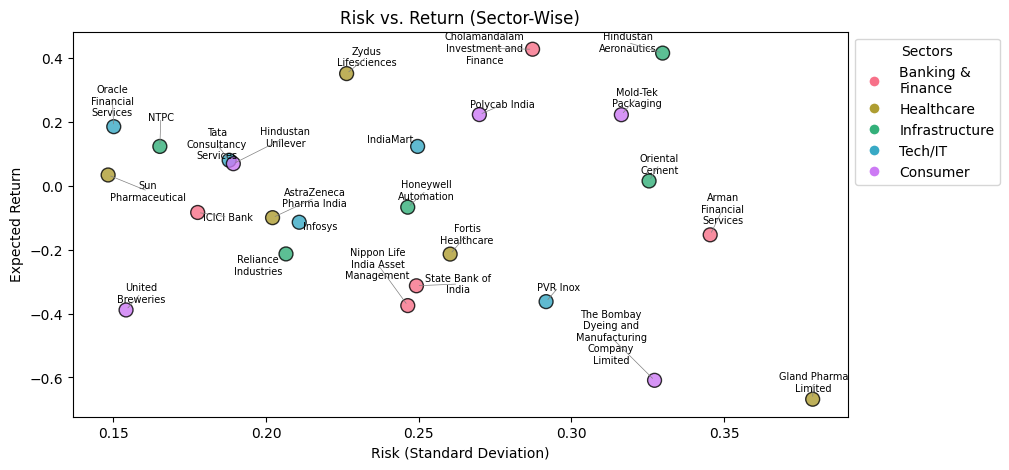

In [ ]:
# Extract data for all 25 stocks
stock_names = df_3y["Company Name"].values
risks = df_3y["Volatility"].values
returns = df_3y["Expected Return"].values
sectors = df_3y["Sector"].values

# Assign unique colors to each sector
sector_palette = sns.color_palette("husl", len(set(sectors)))
sector_color_map = {sector: sector_palette[i] for i, sector in enumerate(set(sectors))}
colors = [sector_color_map[sector] for sector in sectors]

# Plot scatter plot
plt.figure(figsize=(10, 5))
scatter = plt.scatter(risks, returns, c=colors, alpha=0.8, edgecolors="black", s=100)

# Add annotations with text wrapping
texts = []
for i, name in enumerate(stock_names):
    wrapped_name = "\n".join(textwrap.wrap(name, width=14))  # Wrap text if it's too long
    text = plt.text(risks[i], returns[i], wrapped_name, fontsize=7, ha="right", va="bottom")
    texts.append(text)

# Adjust text positions to prevent overlap
adjust_text(texts,
            arrowprops=dict(arrowstyle="-", color="gray", alpha=1, lw=0.5),
            expand=(1.2, 1.5),  # Expands the movement range
            force_text=(0.5, 1),  # Pushes text further from points
            relpos=(0.5, 1.2))  # Moves text further along the arrow direction


import textwrap

# Wrap sector names to fit within the legend
wrapped_legend_labels = {sector: "\n".join(textwrap.wrap(sector, width=14)) for sector in sector_color_map.keys()}

# Create legend elements with wrapped text
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=wrapped_legend_labels[sector],
               markersize=8, markerfacecolor=color)
    for sector, color in sector_color_map.items()
]

# Adjust legend position and spacing
plt.legend(handles=legend_elements, title="Sectors", loc="upper left", bbox_to_anchor=(1,1))


# Labels and title
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Return")
plt.title("Risk vs. Return (Sector-Wise)")

plt.show()

#Optimisation

In [ ]:
# Function to optimize a single stock combination
def optimize_combination(combination, df, correlation_matrix, risk_free_rate):
    """Optimize portfolio weights for a given combination of stocks."""
    expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
    volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
    correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

    n = len(combination)

    # Objective function: maximize Sharpe Ratio
    def objective_function(weights):
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
        portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
        return - (portfolio_sharpe)

    # Constraint: Portfolio weights sum to 1
    def budget_constraint(weights):
        return np.sum(weights) - 1

    # Initial equal weights
    initial_weights = np.ones(n) / n

    constraints = [{"type": "eq", "fun": budget_constraint}]

    # Set lower bound to ensure no stock gets 0% allocation
    min_weight = 0.01  # Set to 1% (adjustable)
    bounds = [(min_weight, 1) for _ in range(n)]

    # Perform optimization
    result = minimize(
        objective_function,
        initial_weights,
        method="SLSQP",
        bounds=bounds,
        constraints=constraints
    )

    if result.success:
        optimal_weights = result.x
        portfolio_return = np.dot(optimal_weights, expected_returns)
        portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
        portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
        return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
    else:
        return None

In [ ]:
# User inputs
investment_budget = 10000
risk_appetite = 0.15  # User-defined risk tolerance
threshold = 0.05

# Step 1: Generate valid combinations
unique_sectors = df_3y["Sector"].unique()
sector_stock_map = {sector: df_3y[df_3y["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
valid_combinations = list(product(*sector_stock_map.values()))

# Step 2: Define the prefilter function
def prefilter_combinations(df, correlation_matrix, combinations, risk_appetite, threshold):
    filtered = []
    for combo in combinations:
        expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
        corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

        weights = np.ones(len(combo)) / len(combo)  # Equal weights
        portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

        if portfolio_risk <= risk_appetite + threshold:
            filtered.append(combo)

    return filtered

filtered_combinations = prefilter_combinations(df_3y, correlation_matrix_3y, valid_combinations, risk_appetite, threshold)

In [ ]:
len(filtered_combinations)

3125

In [ ]:
# Function to optimize portfolio
def optimize_portfolio(df, correlation_matrix, risk_free_rate):
    """Optimize portfolio for a given dataset."""
    best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
    for combination in filtered_combinations:
        result = optimize_combination(combination, df, correlation_matrix, risk_free_rate)
        if result and result[4] > best_sharpe:
            best_combination, best_weights, best_return, best_risk, best_sharpe = result
    return best_combination, best_weights, best_return, best_risk, best_sharpe

In [ ]:
# Optimize portfolio for 3-year data
best_3y = optimize_portfolio(df_3y, correlation_matrix_3y, risk_free_rate)

# Extract the optimal weights and combination from the 3-year optimization
optimal_combination_3y, optimal_weights_3y, _, _, _ = best_3y

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:492: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python

In [ ]:
# Evaluate the 3-year optimized portfolio on 2-Year data
def evaluate_portfolio(combination, weights, df, correlation_matrix, risk_free_rate):
    """Evaluate portfolio performance using given weights."""
    expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
    volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
    correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

    # Calculate portfolio metrics
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
    portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0

    return portfolio_return, portfolio_risk, portfolio_sharpe

# Evaluate the 3-year optimized portfolio on 2-Year data
portfolio_return_2y, portfolio_risk_2y, portfolio_sharpe_2y = evaluate_portfolio(
    optimal_combination_3y, optimal_weights_3y, df_2y, correlation_matrix_2y, risk_free_rate
)

In [ ]:
# Display results for 3-year optimized portfolio
print("Optimal Portfolio Allocation (3-Year Data):")
for stock, weight in zip(optimal_combination_3y, optimal_weights_3y):
    allocation_amount = weight * investment_budget
    allocation_rounded = round(allocation_amount)
    print(f"{stock}: {allocation_rounded:.0f} ({weight:.2%})")

print(f"\nPerformance Metrics (3-Year Data):")
print(f"Expected Return: {best_3y[2]:.4%}")
print(f"Portfolio Risk: {best_3y[3]:.4%}")
print(f"Sharpe Ratio: {best_3y[4]:.4f}")

# Display results for 3-year optimized portfolio on 2-Year data
print("\nPerformance of 3-Year Optimized Portfolio on 2-Year Data:")
print(f"Expected Return: {portfolio_return_2y:.4%}")
print(f"Portfolio Risk: {portfolio_risk_2y:.4%}")
print(f"Sharpe Ratio: {portfolio_sharpe_2y:.4f}")

Optimal Portfolio Allocation (3-Year Data):
OFSS.NS: 1024 (10.24%)
CHOLAFIN.NS: 2660 (26.60%)
MOLDTKPAC.NS: 842 (8.42%)
ZYDUSLIFE.NS: 3642 (36.42%)
HAL.NS: 1831 (18.31%)

Performance Metrics (3-Year Data):
Expected Return: 35.4314%
Portfolio Risk: 14.0589%
Sharpe Ratio: 2.0436

Performance of 3-Year Optimized Portfolio on 2-Year Data:
Expected Return: 36.6309%
Portfolio Risk: 20.1713%
Sharpe Ratio: 1.4838


#Equal Weighted Portfolio

In [ ]:
# List of stocks (tickers) for each sector
tickers = {
    "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
    "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
    "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "GILLETTE.NS", "POLYCAB.NS", "UBL.NS"],
    "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
    "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
}

# Fetch historical data for all stocks for Last 2 Years
start_date = pd.to_datetime('today') - pd.DateOffset(years=2)
end_date = pd.to_datetime('today')

all_data = {}

for sector, ticker_list in tickers.items():
    for ticker in ticker_list:
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            if data.empty:
                print(f"No data available for {ticker}. Skipping.")
                continue
            all_data[ticker] = data['Close']
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}. Skipping.")

# Combine into a DataFrame
combined_data = pd.concat(all_data, axis=1)
combined_data.dropna(inplace=True)

# Calculate daily returns
returns_2y = combined_data.pct_change().dropna()  # Renamed to returns_2y

# Expected return (Annualized)
expected_returns_2y = returns_2y.mean() * 252

# Volatility (Annualized)
volatility_2y = returns_2y.std() * np.sqrt(252)

# Covariance Matrix (Annualized)
covariance_matrix_2y = returns_2y.cov() * 252

# Define Equal Weights for Portfolio
num_stocks_2y = len(expected_returns_2y)
equal_weights_2y = np.array([1 / num_stocks_2y] * num_stocks_2y)  # Equal allocation

# Portfolio Expected Return
ewp_expected_return_2y = np.dot(expected_returns_2y.values, equal_weights_2y)

# Portfolio Volatility
ewp_volatility_2y = np.sqrt(equal_weights_2y.T @ covariance_matrix_2y @ equal_weights_2y)

# Define Risk-Free Rate (Annualized)
risk_free_rate = 0.067

# Calculate Sharpe Ratio
ewp_sharpe_ratio_2y = (ewp_expected_return_2y - risk_free_rate) / ewp_volatility_2y

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# Display results
print("Equal-Weighted Portfolio Performance (2-Year Data):")
print(f"Expected Return: {ewp_expected_return_2y:.4%}")
print(f"Portfolio Volatility: {ewp_volatility_2y:.4%}")
print(f"Sharpe Ratio: {ewp_sharpe_ratio_2y:.4f}")

Equal-Weighted Portfolio Performance (2-Year Data):
Expected Return: 25.1251%
Portfolio Volatility: 14.2557%
Sharpe Ratio: 1.2925


#Model Evaluation

In [ ]:
import numpy as np

def calculate_sortino_ratio(portfolio_returns, risk_free_rate=0.067, periods_per_year=252):
    """Calculate Sortino Ratio for a given return series."""
    excess_returns = portfolio_returns - (risk_free_rate / periods_per_year)
    downside_returns = np.minimum(excess_returns, 0)
    downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
    mean_excess_return = np.mean(excess_returns) * periods_per_year
    sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
    return sortino_ratio

def calculate_max_drawdown(portfolio_values):
    """Calculate Maximum Drawdown (MDD) for a given value series."""
    peak = np.maximum.accumulate(portfolio_values)
    trough = np.minimum.accumulate(portfolio_values)
    drawdown = (trough - peak) / peak
    max_drawdown = np.min(drawdown)
    return max_drawdown

def calculate_risk_metrics(combination, weights, returns_data, risk_free_rate=0.067):
    """Calculate risk metrics for a portfolio."""
    stock_returns = returns_data[list(combination)]
    portfolio_returns = stock_returns.dot(weights)

    # Calculate Sortino Ratio
    sortino_ratio = calculate_sortino_ratio(portfolio_returns, risk_free_rate)

    # Calculate Maximum Drawdown
    portfolio_values = (1 + portfolio_returns).cumprod()
    max_drawdown = calculate_max_drawdown(portfolio_values)

    return sortino_ratio, max_drawdown

def print_all_results(
    optimal_combination_3y, optimal_weights_3y,
    best_return_3y, best_risk_3y, best_sharpe_3y,
    portfolio_return_2y, portfolio_risk_2y, portfolio_sharpe_2y,
    ewp_expected_return_2y, ewp_volatility_2y, ewp_sharpe_ratio_2y,
    investment_budget,
    returns_3y, returns_2y, combined_data, equal_weights_2y
):
    # Calculate additional metrics
    sortino_3y, max_dd_3y = calculate_risk_metrics(
        optimal_combination_3y, optimal_weights_3y, returns_3y
    )
    sortino_2y, max_dd_2y = calculate_risk_metrics(
        optimal_combination_3y, optimal_weights_3y, returns_2y
    )
    ewp_sortino, ewp_max_dd = calculate_risk_metrics(
        combined_data.columns, equal_weights_2y, returns_2y
    )

    # Formatting helper
    def fmt(value, is_pct=True, decimals=2):
        return f"{value:.{decimals}%}" if is_pct else f"{value:.{decimals}f}"

    print("\n=== OPTIMAL PORTFOLIO PERFORMANCE ===")
    print("\n[3-Year Training Data]")
    print(f"Allocation (Rs.{investment_budget:,} investment):")
    for stock, weight in zip(optimal_combination_3y, optimal_weights_3y):
        print(f"  {stock}: Rs.{round(weight * investment_budget):,} ({fmt(weight)})")

    print("\nPerformance Metrics:")
    print(f"  Expected Return: {fmt(best_return_3y)}")
    print(f"  Volatility: {fmt(best_risk_3y)}")
    print(f"  Sharpe Ratio: {fmt(best_sharpe_3y, False, 4)}")
    print(f"  Sortino Ratio: {fmt(sortino_3y, False, 4)}")
    print(f"  Max Drawdown: {fmt(max_dd_3y)}")

    print("\n[2-Year Test Data]")
    print("\nOptimized Portfolio:")
    print(f"  Expected Return: {fmt(portfolio_return_2y)}")
    print(f"  Volatility: {fmt(portfolio_risk_2y)}")
    print(f"  Sharpe Ratio: {fmt(portfolio_sharpe_2y, False, 4)}")
    print(f"  Sortino Ratio: {fmt(sortino_2y, False, 4)}")
    print(f"  Max Drawdown: {fmt(max_dd_2y)}")

    print("\nEqual Weight Benchmark:")
    print(f"  Expected Return: {fmt(ewp_expected_return_2y)}")
    print(f"  Volatility: {fmt(ewp_volatility_2y)}")
    print(f"  Sharpe Ratio: {fmt(ewp_sharpe_ratio_2y, False, 4)}")
    print(f"  Sortino Ratio: {fmt(ewp_sortino, False, 4)}")
    print(f"  Max Drawdown: {fmt(ewp_max_dd)}")

# Call the combined function
print_all_results(
    optimal_combination_3y, optimal_weights_3y,
    best_3y[2], best_3y[3], best_3y[4],
    portfolio_return_2y, portfolio_risk_2y, portfolio_sharpe_2y,
    ewp_expected_return_2y, ewp_volatility_2y, ewp_sharpe_ratio_2y,
    investment_budget,
    returns_3y, returns_2y, combined_data, equal_weights_2y
)


=== OPTIMAL PORTFOLIO PERFORMANCE ===

[3-Year Training Data]
Allocation (Rs.10,000 investment):
  OFSS.NS: Rs.1,024 (10.24%)
  CHOLAFIN.NS: Rs.2,660 (26.60%)
  MOLDTKPAC.NS: Rs.842 (8.42%)
  ZYDUSLIFE.NS: Rs.3,642 (36.42%)
  HAL.NS: Rs.1,831 (18.31%)

Performance Metrics:
  Expected Return: 35.43%
  Volatility: 14.06%
  Sharpe Ratio: 2.0436
  Sortino Ratio: 3.9038
  Max Drawdown: -14.51%

[2-Year Test Data]

Optimized Portfolio:
  Expected Return: 36.63%
  Volatility: 20.17%
  Sharpe Ratio: 1.4838
  Sortino Ratio: 2.5256
  Max Drawdown: -58.55%

Equal Weight Benchmark:
  Expected Return: 25.13%
  Volatility: 14.26%
  Sharpe Ratio: 1.2925
  Sortino Ratio: 2.0472
  Max Drawdown: -46.66%


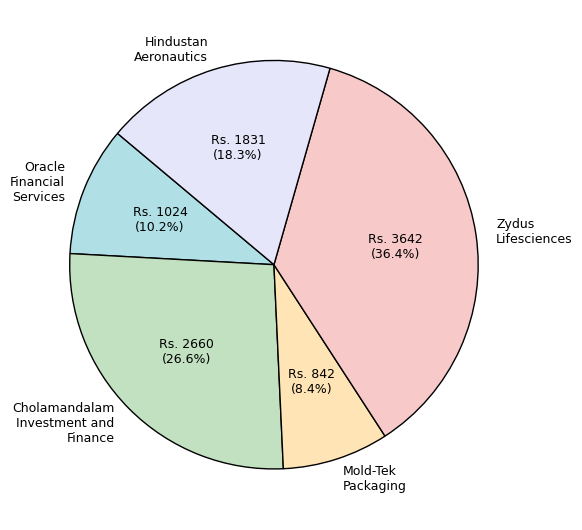

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

def plot_portfolio_weights_pie(stock_names, weights, df, total_investment=10000):
    company_names = [df.loc[df["Ticker"] == ticker, "Company Name"].values[0] for ticker in stock_names]
    wrapped_names = wrap_labels(company_names, width=15)
    weights_percentage = np.array(weights) * 100
    weights_amount = np.array(weights) * total_investment

    pastel_colors = [
        "#b0e0e6", "#c1e1c1", "#ffe4b5", "#f7cac9", "#e6e6fa", "#d5f4e6", "#f0e68c"
    ]
    while len(pastel_colors) < len(weights_percentage):
        pastel_colors.extend(pastel_colors)

    def format_autopct(pct):
        total = total_investment
        amount = int(round(pct * total / 100.0))
        return f"Rs. {amount}\n({pct:.1f}%)"

    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        weights_percentage,
        labels=wrapped_names,
        colors=pastel_colors[:len(weights_percentage)],
        autopct=format_autopct,
        startangle=140,
        textprops={'fontsize': 9},
        wedgeprops={'edgecolor': 'black'}
    )

    plt.tight_layout()
    plt.show()

plot_portfolio_weights_pie(optimal_combination_3y, optimal_weights_3y, df_3y, total_investment=10000)


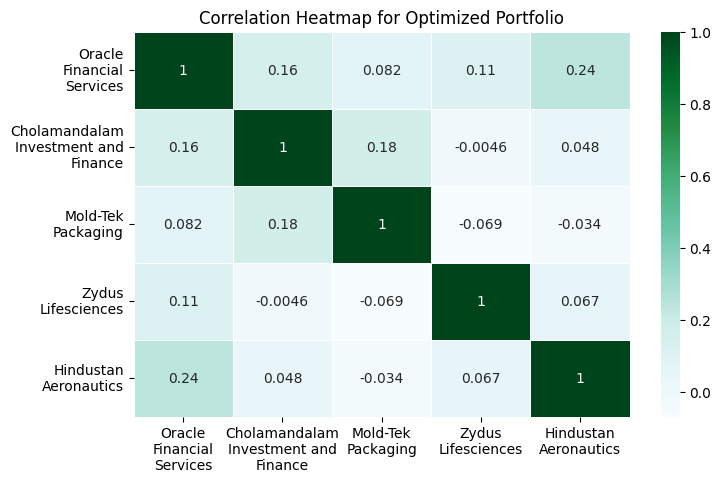

In [ ]:
# Create a mapping from ticker to company name (assuming df_3y has this info)
ticker_to_name = dict(zip(df_3y["Ticker"], df_3y["Company Name"]))

# Extract the best stock combination from the 3-year optimization
selected_stocks = list(optimal_combination_3y)

# Replace stock tickers with company names
company_names = [ticker_to_name[ticker] for ticker in selected_stocks]

# Creating the correlation matrix for the selected stocks
best_combination_corr = correlation_matrix_3y.loc[selected_stocks, selected_stocks]

# Renaming the axes with company names
best_combination_corr.columns = company_names
best_combination_corr.index = company_names

# Function to wrap text labels
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Plotting the heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(best_combination_corr, cmap="BuGn", annot=True, linewidths=0.5)

# Update x and y ticks with wrapped labels
ax.set_xticklabels(wrap_labels(company_names), rotation=0, ha="center")
ax.set_yticklabels(wrap_labels(company_names), rotation=0, va="center")

plt.title("Correlation Heatmap for Optimized Portfolio")
plt.show()


#Website

In [ ]:
# Install required packages
!pip install flask pyngrok yfinance numpy pandas scipy matplotlib seaborn adjustText

from flask import Flask, render_template, request, jsonify, url_for
from pyngrok import ngrok
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import json
from datetime import datetime, timedelta
import traceback
from IPython.display import display, HTML, Javascript


# Initialize Flask app
app = Flask(__name__)

# Create the templates directory if it doesn't exist
import os
if not os.path.exists('templates'):
    os.makedirs('templates')

# Write the HTML templates
with open('templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Optimizer</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            padding-top: 20px;
            background-color: #f5f7fa;
        }
        .container {
            max-width: 1200px;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 30px;
        }
        .form-label {
            font-weight: 600;
        }
        .btn-primary {
            background-color: #3498db;
            border: none;
        }
        .btn-primary:hover {
            background-color: #2980b9;
        }
        .results-card {
            margin-top: 30px;
            display: none;
        }
        .stock-allocation {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 20px;
            margin-bottom: 20px;
        }
        .metrics-table {
            margin-top: 20px;
        }
        .loading {
            text-align: center;
            margin: 20px 0;
            display: none;
        }
        .sector-title {
            margin-top: 15px;
            margin-bottom: 10px;
            font-weight: 600;
            color: #2c3e50;
        }
        #results {
            margin-top: 30px;
        }
        .portfolio-chart {
            margin: 30px 0;
            text-align: center;
        }
        #error-message {
            display: none;
            color: #e74c3c;
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background-color: #fadbd8;
        }
        .fade-in {
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .metric-card {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            height: 100%;
        }
        .metric-value {
            font-size: 1.5rem;
            font-weight: bold;
            margin: 10px 0;
        }
        .metric-label {
            font-size: 0.9rem;
            color: #6c757d;
        }
        .metric-description {
            font-size: 0.9rem;
            color: #6c757d;
            margin-top: 5px;
            font-style: italic;
        }
        .risk-level {
            font-size: 0.9rem;
            color: #6c757d;
            margin-left: 5px;
        }
        .performance-section {
            background-color: #f1f8ff;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 20px;
        }
        .performance-header {
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 1px solid #dee2e6;
        }
    </style>
</head>
<body>
   <div class="container">
    <h1 class="text-center">Portfolio Optimizer</h1>

    <form id="portfolio-form">
        <div class="row mb-4">
            <div class="col-md-6">
                <label for="investment" class="form-label">Investment Amount (₹)</label>
                <input type="number" class="form-control" id="investment" name="investment" min="1000" placeholder="Enter investment amount" required>
            </div>
            <div class="col-md-6">
                <label for="risk" class="form-label">Risk Tolerance (%) <span class="risk-level">(5-25: Low, 25-45: Medium, >45: High)</span></label>
                <input type="number" class="form-control" id="risk" name="risk" min="5" max="100" step="1" placeholder="Enter risk tolerance" required>
            </div>
        </div>

            <div class="text-center">
                <button type="submit" class="btn btn-primary px-5 py-2">Optimize Portfolio</button>
            </div>
        </form>

        <div class="loading" id="loading">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <p class="mt-2">Optimizing your portfolio. This may take a minute...</p>
        </div>

        <div id="error-message"></div>

        <div id="results"></div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        document.getElementById('portfolio-form').addEventListener('submit', function(e) {
            e.preventDefault();

            // Show loading indicator
            document.getElementById('loading').style.display = 'block';
            document.getElementById('results').innerHTML = '';
            document.getElementById('error-message').style.display = 'none';

            // Get form data
            const formData = new FormData(this);
            const data = {};
            for (let [key, value] of formData.entries()) {
                // Convert risk percentage to decimal
                if (key === 'risk') {
                    data[key] = parseFloat(value) / 100;
                } else {
                    data[key] = value;
                }
            }

            // Send API request
            fetch('/optimize', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('loading').style.display = 'none';

                if (data.error) {
                    document.getElementById('error-message').textContent = data.error;
                    document.getElementById('error-message').style.display = 'block';
                    return;
                }

                displayResults(data);
            })
            .catch(error => {
                document.getElementById('loading').style.display = 'none';
                document.getElementById('error-message').textContent = 'An error occurred. Please try again.';
                document.getElementById('error-message').style.display = 'block';
                console.error('Error:', error);
            });
        });

        function displayResults(data) {
            const resultsDiv = document.getElementById('results');

            // Create results HTML
            let html = `
            <div class="card results-card fade-in">
                <div class="card-header bg-primary text-white">
                    <h3 class="mb-0">Optimized Portfolio</h3>
                </div>
                <div class="card-body">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="stock-allocation">
                                <h4>Allocation</h4>
                                <table class="table table-striped">
                                    <thead>
                                        <tr>
                                            <th>Stock</th>
                                            <th>Company</th>
                                            <th>Amount (₹)</th>
                                            <th>Weight</th>
                                        </tr>
                                    </thead>
                                    <tbody>`;

            // Add stock allocations to the table
            data.allocation.forEach(stock => {
                html += `
                <tr>
                    <td>${stock.ticker}</td>
                    <td>${stock.company}</td>
                    <td>${stock.amount}</td>
                    <td>${stock.weight}</td>
                </tr>`;
            });

            html += `
                                    </tbody>
                                </table>
                            </div>
                        </div>
                        <div class="col-md-6">
                            <div class="portfolio-chart">
                                <h4>Portfolio Composition</h4>
                                <canvas id="allocationChart" width="400" height="300"></canvas>
                            </div>
                        </div>
                    </div>

                    <div class="performance-section mt-4">
                        <div class="performance-header">
                            <h4>Portfolio Performance Metrics</h4>
                        </div>

                        <div class="row">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Expected Return</h5>
                                    <div class="metric-value">${data.metrics.expected_return}</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Portfolio Risk</h5>
                                    <div class="metric-value">${data.metrics.portfolio_risk}</div>
                                </div>
                            </div>
                        </div>

                        <div class="row mt-3">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sharpe Ratio</h5>
                                    <div class="metric-value">${data.metrics.sharpe_ratio}</div>
                                    <div class="metric-description">Risk-adjusted return relative to risk-free rate</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sortino Ratio</h5>
                                    <div class="metric-value">${data.metrics.sortino_ratio}</div>
                                    <div class="metric-description">Return adjusted for downside risk only</div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>`;

            // Add the HTML to the results div
            resultsDiv.innerHTML = html;

            // Display the results card
            document.querySelector('.results-card').style.display = 'block';

            // Create the pie chart
            const ctx = document.getElementById('allocationChart').getContext('2d');
            new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: data.allocation.map(stock => stock.ticker),
                    datasets: [{
                        data: data.allocation.map(stock => parseFloat(stock.weight.replace('%', ''))),
                        backgroundColor: [
                            '#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6',
                            '#1abc9c', '#d35400', '#c0392b', '#16a085', '#8e44ad'
                        ]
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'right'
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>
    """)

# Stock data and helper functions
class PortfolioOptimizer:
    def __init__(self):
        self.tickers = {
            "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
            "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
            "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
            "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
            "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
        }

        self.company_names = {
            "TCS.NS": "Tata Consultancy Services",
            "INFY.NS": "Infosys",
            "OFSS.NS": "Oracle Financial Services",
            "INDIAMART.NS": "IndiaMart",
            "PVRINOX.NS": "PVR Inox",
            "SBIN.NS": "State Bank of India",
            "ICICIBANK.NS": "ICICI Bank",
            "NAM-INDIA.NS": "Nippon Life India Asset Management",
            "ARMANFIN.NS": "Arman Financial Services",
            "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
            "HINDUNILVR.NS": "Hindustan Unilever",
            "MOLDTKPAC.NS": "Mold-Tek Packaging",
            "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
            "POLYCAB.NS": "Polycab India",
            "UBL.NS": "United Breweries",
            "SUNPHARMA.NS": "Sun Pharmaceutical",
            "ZYDUSLIFE.NS": "Zydus Lifesciences",
            "GLAND.NS": "Gland Pharma Limited",
            "ASTRAZEN.NS": "AstraZeneca Pharma India",
            "FORTIS.NS": "Fortis Healthcare",
            "NTPC.NS": "NTPC",
            "HONAUT.NS": "Honeywell Automation",
            "ORIENTCEM.NS": "Oriental Cement",
            "HAL.NS": "Hindustan Aeronautics",
            "RELIANCE.NS": "Reliance Industries"
        }

        # Set the fixed risk threshold to 0.067 as requested
        self.risk_free_rate = 0.067  # 6.7% annualized

    def fetch_data(self, start_date, end_date):
        all_data = {}
        for sector, ticker_list in self.tickers.items():
            for ticker in ticker_list:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data available for {ticker}. Skipping.")
                        continue
                    all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
                except Exception as e:
                    print(f"Error downloading data for {ticker}: {e}. Skipping.")

        if not all_data:
            raise ValueError("Could not download any stock data. Please check your internet connection.")

        return pd.concat(all_data, axis=1).dropna()

    def calculate_metrics(self, data):
        # Calculate daily returns
        returns = data.pct_change().dropna()

        # Flatten the MultiIndex in returns.columns if it exists
        if isinstance(returns.columns, pd.MultiIndex):
            returns.columns = returns.columns.get_level_values(0)

        # Calculate expected returns (annualized)
        expected_returns = returns.mean() * 252

        # Calculate volatility (annualized)
        volatility = returns.std() * np.sqrt(252)

        # Calculate correlation matrix
        correlation_matrix = returns.corr()

        return returns, expected_returns, volatility, correlation_matrix

    def create_dataframe(self, expected_returns, volatility, correlation_matrix):
        stock_info = []

        for ticker in expected_returns.index:
            # Find which sector this ticker belongs to
            sector = next((s for s, tickers in self.tickers.items() if ticker in tickers), "Unknown")

            stock_info.append({
                "Ticker": ticker,
                "Company Name": self.company_names.get(ticker, "Unknown"),
                "Sector": sector,
                "Expected Return": expected_returns[ticker],
                "Volatility": volatility[ticker]
            })

        df = pd.DataFrame(stock_info)
        df["Sharpe Ratio"] = (df["Expected Return"] - self.risk_free_rate) / df["Volatility"]
        return df

    def optimize_combination(self, combination, df, correlation_matrix, risk_free_rate):
        """Optimize portfolio weights for a given combination of stocks."""
        expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
        correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

        n = len(combination)

        # Objective function: maximize Sharpe Ratio
        def objective_function(weights):
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return -(portfolio_sharpe)

        # Constraint: Portfolio weights sum to 1
        def budget_constraint(weights):
            return np.sum(weights) - 1

        # Initial equal weights
        initial_weights = np.ones(n) / n

        constraints = [{"type": "eq", "fun": budget_constraint}]

        # Set lower bound to ensure no stock gets 0% allocation
        min_weight = 0.01  # Set to 1% (adjustable)
        bounds = [(min_weight, 1) for _ in range(n)]

        # Perform optimization
        result = minimize(
            objective_function,
            initial_weights,
            method="SLSQP",
            bounds=bounds,
            constraints=constraints
        )

        if result.success:
            optimal_weights = result.x
            portfolio_return = np.dot(optimal_weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
        else:
            return None

    def prefilter_combinations(self, df, correlation_matrix, combinations, risk_appetite, threshold=0.05):
        """
        Prefilter combinations based on risk appetite using threshold
        """
        filtered = []
        for combo in combinations:
            expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
            volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
            corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

            weights = np.ones(len(combo)) / len(combo)  # Equal weights
            portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

            if portfolio_risk <= risk_appetite + threshold:
                filtered.append(combo)

        return filtered

    def optimize_portfolio(self, df, correlation_matrix, risk_free_rate, filtered_combinations):
        """Optimize portfolio for a given dataset."""
        best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
        for combination in filtered_combinations:
            result = self.optimize_combination(combination, df, correlation_matrix, risk_free_rate)
            if result and result[4] > best_sharpe:
                best_combination, best_weights, best_return, best_risk, best_sharpe = result
        return best_combination, best_weights, best_return, best_risk, best_sharpe

    def calculate_sortino_ratio(self, returns, risk_free_rate=0.067, periods_per_year=252):
        """Calculate Sortino Ratio for a given return series."""
        excess_returns = returns - (risk_free_rate / periods_per_year)
        downside_returns = np.minimum(excess_returns, 0)
        downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
        mean_excess_return = np.mean(excess_returns) * periods_per_year
        sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
        return sortino_ratio

    def run_optimization(self, investment_budget, risk_appetite):
        # Define fixed time periods
        training_years = 5  # Training period of 5 years
        test_years = 2      # Test period of 2 years

        today = datetime.now()
        training_start = today - timedelta(days=365 * training_years)  # Start 5 years ago
        training_end = today - timedelta(days=365 * test_years)        # End 2 years ago
        test_start = training_end                                      # Test starts where training ends
        test_end = today    # Test ends today

        # Fetch data for both periods
        training_data = self.fetch_data(training_start, training_end)
        test_data = self.fetch_data(test_start, test_end)

        # Calculate metrics for training data
        training_returns, training_expected_returns, training_volatility, training_correlation_matrix = self.calculate_metrics(training_data)

        # Calculate metrics for test data
        test_returns, test_expected_returns, test_volatility, test_correlation_matrix = self.calculate_metrics(test_data)

        # Create DataFrames
        training_df = self.create_dataframe(training_expected_returns, training_volatility, training_correlation_matrix)
        test_df = self.create_dataframe(test_expected_returns, test_volatility, test_correlation_matrix)

        # Generate valid combinations (one stock from each sector)
        unique_sectors = training_df["Sector"].unique()
        sector_stock_map = {sector: training_df[training_df["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
        valid_combinations = list(product(*sector_stock_map.values()))

        # Explicit threshold value matching original code
        threshold = 0.05

        # Prefilter combinations based on risk appetite with explicit threshold parameter
        filtered_combinations = self.prefilter_combinations(
            training_df,
            training_correlation_matrix,
            valid_combinations,
            risk_appetite,
            threshold  # Pass threshold explicitly
        )

        if not filtered_combinations:
            raise ValueError(f"No portfolio combinations match your risk criteria. Try increasing your risk tolerance.")

        # Optimize portfolio for training data
        best_combination, best_weights, best_return, best_risk, best_sharpe = self.optimize_portfolio(
            training_df, training_correlation_matrix, self.risk_free_rate, filtered_combinations
        )

        if best_combination is None:
            raise ValueError("Optimization failed. Please try different parameters.")

        # Calculate portfolio metrics using training data - align with original implementation
        # Extract needed data for selected stocks
        stock_returns = training_returns[list(best_combination)]

        # Calculate portfolio daily returns using optimal weights
        portfolio_returns = stock_returns.dot(best_weights)

        # Calculate Sortino ratio
        sortino_ratio = self.calculate_sortino_ratio(portfolio_returns, self.risk_free_rate)

        # Prepare allocation for display
        allocation = []
        for ticker, weight in zip(best_combination, best_weights):
            allocation_amount = weight * investment_budget
            allocation_rounded = round(allocation_amount)
            allocation.append({
                "ticker": ticker,
                "company": self.company_names.get(ticker, "Unknown"),
                "amount": f"₹{allocation_rounded:,}",
                "weight": f"{weight*100:.2f}%"
            })

        # Format metrics using directly calculated values from optimization
        formatted_metrics = {
            "expected_return": f"{best_return:.2%}",
            "portfolio_risk": f"{best_risk:.2%}",
            "sharpe_ratio": f"{best_sharpe:.4f}",
            "sortino_ratio": f"{sortino_ratio:.4f}"
        }

        return {
            "allocation": allocation,
            "metrics": formatted_metrics
        }

# Define routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/optimize', methods=['POST'])
def optimize():
    try:
        data = request.json
        investment = float(data.get('investment', 10000))
        risk_appetite = float(data.get('risk', 0.10))  # This is now receiving decimal (already converted from % in frontend)

        # Input validation
        if investment < 1000:
            return jsonify({"error": "Investment amount must be at least ₹1,000"})
        if risk_appetite < 0.05:
            return jsonify({"error": "Risk tolerance must be at least 5%"})

        optimizer = PortfolioOptimizer()
        results = optimizer.run_optimization(investment, risk_appetite)

        return jsonify(results)

    except ValueError as e:
        return jsonify({"error": str(e)})
    except Exception as e:
        print(traceback.format_exc())
        return jsonify({"error": f"An unexpected error occurred: {str(e)}"})


# Main execution
if __name__ == '__main__':
    # Use Google Colab's way of exposing the app instead of ngrok
    from google.colab.output import eval_js
    print("Starting Flask server...")

    # Optional: Use JavaScript to show the URL
    js = """
    async function getPublicUrl() {
        const proxyUrl = await google.colab.kernel.proxyPort(5000);
        document.getElementById('app_link').innerHTML = `<a href="${proxyUrl}" target="_blank">Open Portfolio Optimizer</a>`;
        return proxyUrl;
    }
    getPublicUrl();
    """
    display(HTML('<div id="app_link">Loading application link...</div>'))
    display(Javascript(js))

    # Start Flask app
    app.run(port=5000, host='0.0.0.0')

Starting Flask server...


<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 11:45:41] "GET / HTTP/1.1" 200 -
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100

In [ ]:
# Install required packages
!pip install flask pyngrok yfinance numpy pandas scipy matplotlib seaborn adjustText

from flask import Flask, render_template, request, jsonify, url_for
from pyngrok import ngrok
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import json
from datetime import datetime, timedelta
import traceback
from IPython.display import display, HTML, Javascript


# Initialize Flask app
app = Flask(__name__)

# Create the templates directory if it doesn't exist
import os
if not os.path.exists('templates'):
    os.makedirs('templates')

# Write the HTML templates
with open('templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Optimizer</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            padding-top: 20px;
            background-color: #f5f7fa;
        }
        .container {
            max-width: 1200px;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 30px;
        }
        .form-label {
            font-weight: 600;
        }
        .btn-primary {
            background-color: #3498db;
            border: none;
        }
        .btn-primary:hover {
            background-color: #2980b9;
        }
        .results-card {
            margin-top: 30px;
            display: none;
        }
        .stock-allocation {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 20px;
            margin-bottom: 20px;
        }
        .metrics-table {
            margin-top: 20px;
        }
        .loading {
            text-align: center;
            margin: 20px 0;
            display: none;
        }
        .sector-title {
            margin-top: 15px;
            margin-bottom: 10px;
            font-weight: 600;
            color: #2c3e50;
        }
        #results {
            margin-top: 30px;
        }
        .portfolio-chart {
            margin: 30px 0;
            text-align: center;
        }
        #error-message {
            display: none;
            color: #e74c3c;
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background-color: #fadbd8;
        }
        .fade-in {
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .metric-card {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            height: 100%;
        }
        .metric-value {
            font-size: 1.5rem;
            font-weight: bold;
            margin: 10px 0;
        }
        .metric-label {
            font-size: 0.9rem;
            color: #6c757d;
        }
        .metric-description {
            font-size: 0.9rem;
            color: #6c757d;
            margin-top: 5px;
            font-style: italic;
        }
        .risk-level {
            font-size: 0.9rem;
            color: #6c757d;
            margin-left: 5px;
        }
        .performance-section {
            background-color: #f1f8ff;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 20px;
        }
        .performance-header {
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 1px solid #dee2e6;
        }
    </style>
</head>
<body>
   <div class="container">
    <h1 class="text-center">Portfolio Optimizer</h1>

    <form id="portfolio-form">
        <div class="row mb-4">
            <div class="col-md-6">
                <label for="investment" class="form-label">Investment Amount (₹)</label>
                <input type="number" class="form-control" id="investment" name="investment" min="1000" placeholder="Enter investment amount" required>
            </div>
            <div class="col-md-6">
                <label for="risk" class="form-label">Risk Tolerance (%) <span class="risk-level">(5-25: Low, 25-45: Medium, >45: High)</span></label>
                <input type="number" class="form-control" id="risk" name="risk" min="5" max="100" step="1" placeholder="Enter risk tolerance" required>
            </div>
        </div>

            <div class="text-center">
                <button type="submit" class="btn btn-primary px-5 py-2">Optimize Portfolio</button>
            </div>
        </form>

        <div class="loading" id="loading">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <p class="mt-2">Optimizing your portfolio. This may take a minute...</p>
        </div>

        <div id="error-message"></div>

        <div id="results"></div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        document.getElementById('portfolio-form').addEventListener('submit', function(e) {
            e.preventDefault();

            // Show loading indicator
            document.getElementById('loading').style.display = 'block';
            document.getElementById('results').innerHTML = '';
            document.getElementById('error-message').style.display = 'none';

            // Get form data
            const formData = new FormData(this);
            const data = {};
            for (let [key, value] of formData.entries()) {
                // Convert risk percentage to decimal
                if (key === 'risk') {
                    data[key] = parseFloat(value) / 100;
                } else {
                    data[key] = value;
                }
            }

            // Send API request
            fetch('/optimize', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('loading').style.display = 'none';

                if (data.error) {
                    document.getElementById('error-message').textContent = data.error;
                    document.getElementById('error-message').style.display = 'block';
                    return;
                }

                displayResults(data);
            })
            .catch(error => {
                document.getElementById('loading').style.display = 'none';
                document.getElementById('error-message').textContent = 'An error occurred. Please try again.';
                document.getElementById('error-message').style.display = 'block';
                console.error('Error:', error);
            });
        });

        function displayResults(data) {
            const resultsDiv = document.getElementById('results');

            // Create results HTML
            let html = `
            <div class="card results-card fade-in">
                <div class="card-header bg-primary text-white">
                    <h3 class="mb-0">Optimized Portfolio</h3>
                </div>
                <div class="card-body">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="stock-allocation">
                                <h4>Allocation</h4>
                                <table class="table table-striped">
                                    <thead>
                                        <tr>
                                            <th>Stock</th>
                                            <th>Company</th>
                                            <th>Amount (₹)</th>
                                            <th>Weight</th>
                                        </tr>
                                    </thead>
                                    <tbody>`;

            // Add stock allocations to the table
            data.allocation.forEach(stock => {
                html += `
                <tr>
                    <td>${stock.ticker}</td>
                    <td>${stock.company}</td>
                    <td>${stock.amount}</td>
                    <td>${stock.weight}</td>
                </tr>`;
            });

            html += `
                                    </tbody>
                                </table>
                            </div>
                        </div>
                        <div class="col-md-6">
                            <div class="portfolio-chart">
                                <h4>Portfolio Composition</h4>
                                <canvas id="allocationChart" width="400" height="300"></canvas>
                            </div>
                        </div>
                    </div>

                    <div class="performance-section mt-4">
                        <div class="performance-header">
                            <h4>Portfolio Performance Metrics</h4>
                        </div>

                        <div class="row">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Expected Return</h5>
                                    <div class="metric-value">${data.metrics.expected_return}</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Portfolio Risk</h5>
                                    <div class="metric-value">${data.metrics.portfolio_risk}</div>
                                </div>
                            </div>
                        </div>

                        <div class="row mt-3">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sharpe Ratio</h5>
                                    <div class="metric-value">${data.metrics.sharpe_ratio}</div>
                                    <div class="metric-description">Risk-adjusted return relative to risk-free rate</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sortino Ratio</h5>
                                    <div class="metric-value">${data.metrics.sortino_ratio}</div>
                                    <div class="metric-description">Return adjusted for downside risk only</div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>`;

            // Add the HTML to the results div
            resultsDiv.innerHTML = html;

            // Display the results card
            document.querySelector('.results-card').style.display = 'block';

            // Create the pie chart
            const ctx = document.getElementById('allocationChart').getContext('2d');
            new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: data.allocation.map(stock => stock.ticker),
                    datasets: [{
                        data: data.allocation.map(stock => parseFloat(stock.weight.replace('%', ''))),
                        backgroundColor: [
                            '#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6',
                            '#1abc9c', '#d35400', '#c0392b', '#16a085', '#8e44ad'
                        ]
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'right'
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>
    """)

# Stock data and helper functions
class PortfolioOptimizer:
    def __init__(self):
        self.tickers = {
            "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
            "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
            "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
            "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
            "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
        }

        self.company_names = {
            "TCS.NS": "Tata Consultancy Services",
            "INFY.NS": "Infosys",
            "OFSS.NS": "Oracle Financial Services",
            "INDIAMART.NS": "IndiaMart",
            "PVRINOX.NS": "PVR Inox",
            "SBIN.NS": "State Bank of India",
            "ICICIBANK.NS": "ICICI Bank",
            "NAM-INDIA.NS": "Nippon Life India Asset Management",
            "ARMANFIN.NS": "Arman Financial Services",
            "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
            "HINDUNILVR.NS": "Hindustan Unilever",
            "MOLDTKPAC.NS": "Mold-Tek Packaging",
            "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
            "POLYCAB.NS": "Polycab India",
            "UBL.NS": "United Breweries",
            "SUNPHARMA.NS": "Sun Pharmaceutical",
            "ZYDUSLIFE.NS": "Zydus Lifesciences",
            "GLAND.NS": "Gland Pharma Limited",
            "ASTRAZEN.NS": "AstraZeneca Pharma India",
            "FORTIS.NS": "Fortis Healthcare",
            "NTPC.NS": "NTPC",
            "HONAUT.NS": "Honeywell Automation",
            "ORIENTCEM.NS": "Oriental Cement",
            "HAL.NS": "Hindustan Aeronautics",
            "RELIANCE.NS": "Reliance Industries"
        }

        # Set the fixed risk threshold to 0.067 as requested
        self.risk_free_rate = 0.067  # 6.7% annualized

    def fetch_data(self, start_date, end_date):
        all_data = {}
        for sector, ticker_list in self.tickers.items():
            for ticker in ticker_list:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data available for {ticker}. Skipping.")
                        continue
                    all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
                except Exception as e:
                    print(f"Error downloading data for {ticker}: {e}. Skipping.")

        if not all_data:
            raise ValueError("Could not download any stock data. Please check your internet connection.")

        return pd.concat(all_data, axis=1).dropna()

    def calculate_metrics(self, data):
        # Calculate daily returns
        returns = data.pct_change().dropna()

        # Flatten the MultiIndex in returns.columns if it exists
        if isinstance(returns.columns, pd.MultiIndex):
            returns.columns = returns.columns.get_level_values(0)

        # Calculate expected returns (annualized)
        expected_returns = returns.mean() * 252

        # Calculate volatility (annualized)
        volatility = returns.std() * np.sqrt(252)

        # Calculate correlation matrix
        correlation_matrix = returns.corr()

        return returns, expected_returns, volatility, correlation_matrix

    def create_dataframe(self, expected_returns, volatility, correlation_matrix):
        stock_info = []

        for ticker in expected_returns.index:
            # Find which sector this ticker belongs to
            sector = next((s for s, tickers in self.tickers.items() if ticker in tickers), "Unknown")

            stock_info.append({
                "Ticker": ticker,
                "Company Name": self.company_names.get(ticker, "Unknown"),
                "Sector": sector,
                "Expected Return": expected_returns[ticker],
                "Volatility": volatility[ticker]
            })

        df = pd.DataFrame(stock_info)
        df["Sharpe Ratio"] = (df["Expected Return"] - self.risk_free_rate) / df["Volatility"]
        return df

    def optimize_combination(self, combination, df, correlation_matrix, risk_free_rate):
        """Optimize portfolio weights for a given combination of stocks."""
        expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
        correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

        n = len(combination)

        # Objective function: maximize Sharpe Ratio
        def objective_function(weights):
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return -(portfolio_sharpe)

        # Constraint: Portfolio weights sum to 1
        def budget_constraint(weights):
            return np.sum(weights) - 1

        # Initial equal weights
        initial_weights = np.ones(n) / n

        constraints = [{"type": "eq", "fun": budget_constraint}]

        # Set lower bound to ensure no stock gets 0% allocation
        min_weight = 0.01  # Set to 1% (adjustable)
        bounds = [(min_weight, 1) for _ in range(n)]

        # Perform optimization
        result = minimize(
            objective_function,
            initial_weights,
            method="SLSQP",
            bounds=bounds,
            constraints=constraints
        )

        if result.success:
            optimal_weights = result.x
            portfolio_return = np.dot(optimal_weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
        else:
            return None

    def prefilter_combinations(self, df, correlation_matrix, combinations, risk_appetite, threshold=0.05):
        """
        Prefilter combinations based on risk appetite using threshold
        """
        filtered = []
        for combo in combinations:
            expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
            volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
            corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

            weights = np.ones(len(combo)) / len(combo)  # Equal weights
            portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

            if portfolio_risk <= risk_appetite + threshold:
                filtered.append(combo)

        return filtered

    def optimize_portfolio(self, df, correlation_matrix, risk_free_rate, filtered_combinations):
        """Optimize portfolio for a given dataset."""
        best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
        for combination in filtered_combinations:
            result = self.optimize_combination(combination, df, correlation_matrix, risk_free_rate)
            if result and result[4] > best_sharpe:
                best_combination, best_weights, best_return, best_risk, best_sharpe = result
        return best_combination, best_weights, best_return, best_risk, best_sharpe

    def calculate_sortino_ratio(self, returns, risk_free_rate=0.067, periods_per_year=252):
        """Calculate Sortino Ratio for a given return series."""
        excess_returns = returns - (risk_free_rate / periods_per_year)
        downside_returns = np.minimum(excess_returns, 0)
        downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
        mean_excess_return = np.mean(excess_returns) * periods_per_year
        sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
        return sortino_ratio

    def run_optimization(self, investment_budget, risk_appetite):
        # Define fixed time periods
        training_years = 5  # Training period of 5 years
        test_years = 2      # Test period of 2 years

        today = datetime.now()
        training_start = today - timedelta(days=365 * training_years)  # Start 5 years ago
        training_end = today - timedelta(days=365 * test_years)        # End 2 years ago
        test_start = training_end                                      # Test starts where training ends
        test_end = today    # Test ends today

        # Fetch data for both periods
        training_data = self.fetch_data(training_start, training_end)
        test_data = self.fetch_data(test_start, test_end)

        # Calculate metrics for training data
        training_returns, training_expected_returns, training_volatility, training_correlation_matrix = self.calculate_metrics(training_data)

        # Calculate metrics for test data
        test_returns, test_expected_returns, test_volatility, test_correlation_matrix = self.calculate_metrics(test_data)

        # Create DataFrames
        training_df = self.create_dataframe(training_expected_returns, training_volatility, training_correlation_matrix)
        test_df = self.create_dataframe(test_expected_returns, test_volatility, test_correlation_matrix)

        # Generate valid combinations (one stock from each sector)
        unique_sectors = training_df["Sector"].unique()
        sector_stock_map = {sector: training_df[training_df["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
        valid_combinations = list(product(*sector_stock_map.values()))

        # Explicit threshold value matching original code
        threshold = 0.05

        # Prefilter combinations based on risk appetite with explicit threshold parameter
        filtered_combinations = self.prefilter_combinations(
            training_df,
            training_correlation_matrix,
            valid_combinations,
            risk_appetite,
            threshold  # Pass threshold explicitly
        )

        if not filtered_combinations:
            raise ValueError(f"No portfolio combinations match your risk criteria. Try increasing your risk tolerance.")

        # Optimize portfolio for training data
        best_combination, best_weights, best_return, best_risk, best_sharpe = self.optimize_portfolio(
            training_df, training_correlation_matrix, self.risk_free_rate, filtered_combinations
        )

        if best_combination is None:
            raise ValueError("Optimization failed. Please try different parameters.")

        # Calculate portfolio metrics using training data - align with original implementation
        # Extract needed data for selected stocks
        stock_returns = training_returns[list(best_combination)]

        # Calculate portfolio daily returns using optimal weights
        portfolio_returns = stock_returns.dot(best_weights)

        # Calculate Sortino ratio
        sortino_ratio = self.calculate_sortino_ratio(portfolio_returns, self.risk_free_rate)

        # Prepare allocation for display
        allocation = []
        for ticker, weight in zip(best_combination, best_weights):
            allocation_amount = weight * investment_budget
            allocation_rounded = round(allocation_amount)
            allocation.append({
                "ticker": ticker,
                "company": self.company_names.get(ticker, "Unknown"),
                "amount": f"₹{allocation_rounded:,}",
                "weight": f"{weight*100:.2f}%"
            })

        # Format metrics using directly calculated values from optimization
        formatted_metrics = {
            "expected_return": f"{best_return:.2%}",
            "portfolio_risk": f"{best_risk:.2%}",
            "sharpe_ratio": f"{best_sharpe:.4f}",
            "sortino_ratio": f"{sortino_ratio:.4f}"
        }

        return {
            "allocation": allocation,
            "metrics": formatted_metrics
        }

# Define routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/optimize', methods=['POST'])
def optimize():
    try:
        data = request.json
        investment = float(data.get('investment', 10000))
        risk_appetite = float(data.get('risk', 0.10))  # This is now receiving decimal (already converted from % in frontend)

        # Input validation
        if investment < 1000:
            return jsonify({"error": "Investment amount must be at least ₹1,000"})
        if risk_appetite < 0.05:
            return jsonify({"error": "Risk tolerance must be at least 5%"})

        optimizer = PortfolioOptimizer()
        results = optimizer.run_optimization(investment, risk_appetite)

        return jsonify(results)

    except ValueError as e:
        return jsonify({"error": str(e)})
    except Exception as e:
        print(traceback.format_exc())
        return jsonify({"error": f"An unexpected error occurred: {str(e)}"})


# Main execution
if __name__ == '__main__':
    # Use Google Colab's way of exposing the app instead of ngrok
    from google.colab.output import eval_js
    print("Starting Flask server...")

    # Optional: Use JavaScript to show the URL
    js = """
    async function getPublicUrl() {
        const proxyUrl = await google.colab.kernel.proxyPort(5000);
        document.getElementById('app_link').innerHTML = `<a href="${proxyUrl}" target="_blank">Open Portfolio Optimizer</a>`;
        return proxyUrl;
    }
    getPublicUrl();
    """
    display(HTML('<div id="app_link">Loading application link...</div>'))
    display(Javascript(js))

    # Start Flask app
    app.run(port=5000, host='0.0.0.0')

Starting Flask server...


<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 11:45:41] "GET / HTTP/1.1" 200 -
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100

In [ ]:
# Install required packages
!pip install flask pyngrok yfinance numpy pandas scipy matplotlib seaborn adjustText

from flask import Flask, render_template, request, jsonify, url_for
from pyngrok import ngrok
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import json
from datetime import datetime, timedelta
import traceback
from IPython.display import display, HTML, Javascript


# Initialize Flask app
app = Flask(__name__)

# Create the templates directory if it doesn't exist
import os
if not os.path.exists('templates'):
    os.makedirs('templates')

# Write the HTML templates
with open('templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Optimizer</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            padding-top: 20px;
            background-color: #f5f7fa;
        }
        .container {
            max-width: 1200px;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 30px;
        }
        .form-label {
            font-weight: 600;
        }
        .btn-primary {
            background-color: #3498db;
            border: none;
        }
        .btn-primary:hover {
            background-color: #2980b9;
        }
        .results-card {
            margin-top: 30px;
            display: none;
        }
        .stock-allocation {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 20px;
            margin-bottom: 20px;
        }
        .metrics-table {
            margin-top: 20px;
        }
        .loading {
            text-align: center;
            margin: 20px 0;
            display: none;
        }
        .sector-title {
            margin-top: 15px;
            margin-bottom: 10px;
            font-weight: 600;
            color: #2c3e50;
        }
        #results {
            margin-top: 30px;
        }
        .portfolio-chart {
            margin: 30px 0;
            text-align: center;
        }
        #error-message {
            display: none;
            color: #e74c3c;
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background-color: #fadbd8;
        }
        .fade-in {
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .metric-card {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            height: 100%;
        }
        .metric-value {
            font-size: 1.5rem;
            font-weight: bold;
            margin: 10px 0;
        }
        .metric-label {
            font-size: 0.9rem;
            color: #6c757d;
        }
        .metric-description {
            font-size: 0.9rem;
            color: #6c757d;
            margin-top: 5px;
            font-style: italic;
        }
        .risk-level {
            font-size: 0.9rem;
            color: #6c757d;
            margin-left: 5px;
        }
        .performance-section {
            background-color: #f1f8ff;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 20px;
        }
        .performance-header {
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 1px solid #dee2e6;
        }
    </style>
</head>
<body>
   <div class="container">
    <h1 class="text-center">Portfolio Optimizer</h1>

    <form id="portfolio-form">
        <div class="row mb-4">
            <div class="col-md-6">
                <label for="investment" class="form-label">Investment Amount (₹)</label>
                <input type="number" class="form-control" id="investment" name="investment" min="1000" placeholder="Enter investment amount" required>
            </div>
            <div class="col-md-6">
                <label for="risk" class="form-label">Risk Tolerance (%) <span class="risk-level">(5-25: Low, 25-45: Medium, >45: High)</span></label>
                <input type="number" class="form-control" id="risk" name="risk" min="5" max="100" step="1" placeholder="Enter risk tolerance" required>
            </div>
        </div>

            <div class="text-center">
                <button type="submit" class="btn btn-primary px-5 py-2">Optimize Portfolio</button>
            </div>
        </form>

        <div class="loading" id="loading">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <p class="mt-2">Optimizing your portfolio. This may take a minute...</p>
        </div>

        <div id="error-message"></div>

        <div id="results"></div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        document.getElementById('portfolio-form').addEventListener('submit', function(e) {
            e.preventDefault();

            // Show loading indicator
            document.getElementById('loading').style.display = 'block';
            document.getElementById('results').innerHTML = '';
            document.getElementById('error-message').style.display = 'none';

            // Get form data
            const formData = new FormData(this);
            const data = {};
            for (let [key, value] of formData.entries()) {
                // Convert risk percentage to decimal
                if (key === 'risk') {
                    data[key] = parseFloat(value) / 100;
                } else {
                    data[key] = value;
                }
            }

            // Send API request
            fetch('/optimize', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('loading').style.display = 'none';

                if (data.error) {
                    document.getElementById('error-message').textContent = data.error;
                    document.getElementById('error-message').style.display = 'block';
                    return;
                }

                displayResults(data);
            })
            .catch(error => {
                document.getElementById('loading').style.display = 'none';
                document.getElementById('error-message').textContent = 'An error occurred. Please try again.';
                document.getElementById('error-message').style.display = 'block';
                console.error('Error:', error);
            });
        });

        function displayResults(data) {
            const resultsDiv = document.getElementById('results');

            // Create results HTML
            let html = `
            <div class="card results-card fade-in">
                <div class="card-header bg-primary text-white">
                    <h3 class="mb-0">Optimized Portfolio</h3>
                </div>
                <div class="card-body">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="stock-allocation">
                                <h4>Allocation</h4>
                                <table class="table table-striped">
                                    <thead>
                                        <tr>
                                            <th>Stock</th>
                                            <th>Company</th>
                                            <th>Amount (₹)</th>
                                            <th>Weight</th>
                                        </tr>
                                    </thead>
                                    <tbody>`;

            // Add stock allocations to the table
            data.allocation.forEach(stock => {
                html += `
                <tr>
                    <td>${stock.ticker}</td>
                    <td>${stock.company}</td>
                    <td>${stock.amount}</td>
                    <td>${stock.weight}</td>
                </tr>`;
            });

            html += `
                                    </tbody>
                                </table>
                            </div>
                        </div>
                        <div class="col-md-6">
                            <div class="portfolio-chart">
                                <h4>Portfolio Composition</h4>
                                <canvas id="allocationChart" width="400" height="300"></canvas>
                            </div>
                        </div>
                    </div>

                    <div class="performance-section mt-4">
                        <div class="performance-header">
                            <h4>Portfolio Performance Metrics</h4>
                        </div>

                        <div class="row">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Expected Return</h5>
                                    <div class="metric-value">${data.metrics.expected_return}</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Portfolio Risk</h5>
                                    <div class="metric-value">${data.metrics.portfolio_risk}</div>
                                </div>
                            </div>
                        </div>

                        <div class="row mt-3">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sharpe Ratio</h5>
                                    <div class="metric-value">${data.metrics.sharpe_ratio}</div>
                                    <div class="metric-description">Risk-adjusted return relative to risk-free rate</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sortino Ratio</h5>
                                    <div class="metric-value">${data.metrics.sortino_ratio}</div>
                                    <div class="metric-description">Return adjusted for downside risk only</div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>`;

            // Add the HTML to the results div
            resultsDiv.innerHTML = html;

            // Display the results card
            document.querySelector('.results-card').style.display = 'block';

            // Create the pie chart
            const ctx = document.getElementById('allocationChart').getContext('2d');
            new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: data.allocation.map(stock => stock.ticker),
                    datasets: [{
                        data: data.allocation.map(stock => parseFloat(stock.weight.replace('%', ''))),
                        backgroundColor: [
                            '#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6',
                            '#1abc9c', '#d35400', '#c0392b', '#16a085', '#8e44ad'
                        ]
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'right'
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>
    """)

class PortfolioOptimizer:
    def __init__(self):
        self.tickers = {
            "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
            "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
            "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
            "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
            "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
        }

        self.company_names = {
            "TCS.NS": "Tata Consultancy Services",
            "INFY.NS": "Infosys",
            "OFSS.NS": "Oracle Financial Services",
            "INDIAMART.NS": "IndiaMart",
            "PVRINOX.NS": "PVR Inox",
            "SBIN.NS": "State Bank of India",
            "ICICIBANK.NS": "ICICI Bank",
            "NAM-INDIA.NS": "Nippon Life India Asset Management",
            "ARMANFIN.NS": "Arman Financial Services",
            "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
            "HINDUNILVR.NS": "Hindustan Unilever",
            "MOLDTKPAC.NS": "Mold-Tek Packaging",
            "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
            "POLYCAB.NS": "Polycab India",
            "UBL.NS": "United Breweries",
            "SUNPHARMA.NS": "Sun Pharmaceutical",
            "ZYDUSLIFE.NS": "Zydus Lifesciences",
            "GLAND.NS": "Gland Pharma Limited",
            "ASTRAZEN.NS": "AstraZeneca Pharma India",
            "FORTIS.NS": "Fortis Healthcare",
            "NTPC.NS": "NTPC",
            "HONAUT.NS": "Honeywell Automation",
            "ORIENTCEM.NS": "Oriental Cement",
            "HAL.NS": "Hindustan Aeronautics",
            "RELIANCE.NS": "Reliance Industries"
        }

        # Set the fixed risk threshold to 0.067 as requested
        self.risk_free_rate = 0.067  # 6.7% annualized

    def fetch_data(self, start_date, end_date):
        all_data = {}
        for sector, ticker_list in self.tickers.items():
            for ticker in ticker_list:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data available for {ticker}. Skipping.")
                        continue
                    all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
                except Exception as e:
                    print(f"Error downloading data for {ticker}: {e}. Skipping.")

        if not all_data:
            raise ValueError("Could not download any stock data. Please check your internet connection.")

        return pd.concat(all_data, axis=1).dropna()

    def calculate_metrics(self, data):
        # Calculate daily returns - MODIFIED to match standalone script
        returns = data.pct_change().dropna()

        # Flatten the MultiIndex in returns.columns if it exists
        if isinstance(returns.columns, pd.MultiIndex):
            returns.columns = returns.columns.get_level_values(0)
        else:
            # Ensure consistency - Explicitly flatten columns even if not MultiIndex
            returns.columns = returns.columns.astype(str)

        # Calculate expected returns (annualized) - SAME in both implementations
        expected_returns = returns.mean() * 252

        # Calculate volatility (annualized) - SAME in both implementations
        volatility = returns.std() * np.sqrt(252)

        # Calculate correlation matrix - SAME in both implementations
        correlation_matrix = returns.corr()

        return returns, expected_returns, volatility, correlation_matrix

    def create_dataframe(self, expected_returns, volatility, correlation_matrix):
        # MODIFIED to match standalone script structure
        stock_info = []

        for ticker in expected_returns.index:
            # Find which sector this ticker belongs to
            sector = next((s for s, tickers in self.tickers.items() if ticker in tickers), "Unknown")

            stock_info.append({
                "Ticker": ticker,
                "Company Name": self.company_names.get(ticker, "Unknown"),
                "Sector": sector,
                "Expected Return": expected_returns[ticker],
                "Volatility": volatility[ticker]
            })

        df = pd.DataFrame(stock_info)
        df["Sharpe Ratio"] = (df["Expected Return"] - self.risk_free_rate) / df["Volatility"]
        return df

    def optimize_combination(self, combination, df, correlation_matrix, risk_free_rate):
        """Optimize portfolio weights for a given combination of stocks."""
        # Extract data for the selected stocks - SAME in both implementations
        expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
        correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

        n = len(combination)

        # Objective function: maximize Sharpe Ratio - SAME in both implementations
        def objective_function(weights):
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return -(portfolio_sharpe)

        # Constraint: Portfolio weights sum to 1 - SAME in both implementations
        def budget_constraint(weights):
            return np.sum(weights) - 1

        # Initial equal weights - SAME in both implementations
        initial_weights = np.ones(n) / n

        constraints = [{"type": "eq", "fun": budget_constraint}]

        # Set lower bound - SAME in both implementations
        min_weight = 0.01  # Set to 1% (adjustable)
        bounds = [(min_weight, 1) for _ in range(n)]

        # Perform optimization - SAME in both implementations
        result = minimize(
            objective_function,
            initial_weights,
            method="SLSQP",
            bounds=bounds,
            constraints=constraints
        )

        if result.success:
            optimal_weights = result.x
            portfolio_return = np.dot(optimal_weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
        else:
            return None

    def prefilter_combinations(self, df, correlation_matrix, combinations, risk_appetite, threshold=0.05):
        """
        Prefilter combinations based on risk appetite using threshold
        MODIFIED: Ensure exactly the same as standalone script
        """
        filtered = []
        for combo in combinations:
            expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
            volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
            corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

            weights = np.ones(len(combo)) / len(combo)  # Equal weights
            portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

            if portfolio_risk <= risk_appetite + threshold:
                filtered.append(combo)

        return filtered

    def optimize_portfolio(self, df, correlation_matrix, risk_free_rate, filtered_combinations):
        """Optimize portfolio for a given dataset."""
        best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
        for combination in filtered_combinations:
            result = self.optimize_combination(combination, df, correlation_matrix, risk_free_rate)
            if result and result[4] > best_sharpe:
                best_combination, best_weights, best_return, best_risk, best_sharpe = result
        return best_combination, best_weights, best_return, best_risk, best_sharpe

    def calculate_sortino_ratio(self, returns, risk_free_rate=0.067, periods_per_year=252):
        """Calculate Sortino Ratio for a given return series."""
        # MODIFIED to match standalone script exactly
        excess_returns = returns - (risk_free_rate / periods_per_year)
        downside_returns = np.minimum(excess_returns, 0)
        downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
        mean_excess_return = np.mean(excess_returns) * periods_per_year
        sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
        return sortino_ratio

    def run_optimization(self, investment_budget, risk_appetite):
        # Define fixed time periods - SAME in both implementations
        training_years = 5  # Training period of 5 years
        test_years = 2      # Test period of 2 years

        today = datetime.now()
        training_start = today - timedelta(days=365 * training_years)  # Start 5 years ago
        training_end = today - timedelta(days=365 * test_years)        # End 2 years ago
        test_start = training_end                                      # Test starts where training ends
        test_end = today    # Test ends today

        # Fetch data for both periods
        training_data = self.fetch_data(training_start, training_end)
        test_data = self.fetch_data(test_start, test_end)

        # Calculate metrics for training data
        training_returns, training_expected_returns, training_volatility, training_correlation_matrix = self.calculate_metrics(training_data)

        # Calculate metrics for test data
        test_returns, test_expected_returns, test_volatility, test_correlation_matrix = self.calculate_metrics(test_data)

        # Create DataFrames
        training_df = self.create_dataframe(training_expected_returns, training_volatility, training_correlation_matrix)
        test_df = self.create_dataframe(test_expected_returns, test_volatility, test_correlation_matrix)

        # Generate valid combinations (one stock from each sector)
        unique_sectors = training_df["Sector"].unique()
        sector_stock_map = {sector: training_df[training_df["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
        valid_combinations = list(product(*sector_stock_map.values()))

        # Explicit threshold value matching original code
        threshold = 0.05

        # Prefilter combinations based on risk appetite with explicit threshold parameter
        filtered_combinations = self.prefilter_combinations(
            training_df,
            training_correlation_matrix,
            valid_combinations,
            risk_appetite,
            threshold  # Pass threshold explicitly
        )

        if not filtered_combinations:
            raise ValueError(f"No portfolio combinations match your risk criteria. Try increasing your risk tolerance.")

        # Optimize portfolio for training data
        best_combination, best_weights, best_return, best_risk, best_sharpe = self.optimize_portfolio(
            training_df, training_correlation_matrix, self.risk_free_rate, filtered_combinations
        )

        if best_combination is None:
            raise ValueError("Optimization failed. Please try different parameters.")

        # Calculate portfolio metrics using training data - align with original implementation
        # Extract needed data for selected stocks
        stock_returns = training_returns[list(best_combination)]

        # Calculate portfolio daily returns using optimal weights
        portfolio_returns = stock_returns.dot(best_weights)

        # Calculate Sortino ratio
        sortino_ratio = self.calculate_sortino_ratio(portfolio_returns, self.risk_free_rate)

        # Prepare allocation for display
        allocation = []
        for ticker, weight in zip(best_combination, best_weights):
            allocation_amount = weight * investment_budget
            allocation_rounded = round(allocation_amount)
            allocation.append({
                "ticker": ticker,
                "company": self.company_names.get(ticker, "Unknown"),
                "amount": f"₹{allocation_rounded:,}",
                "weight": f"{weight*100:.2f}%"
            })

        # Format metrics using directly calculated values from optimization
        formatted_metrics = {
            "expected_return": f"{best_return:.2%}",
            "portfolio_risk": f"{best_risk:.2%}",
            "sharpe_ratio": f"{best_sharpe:.4f}",
            "sortino_ratio": f"{sortino_ratio:.4f}"
        }

        return {
            "allocation": allocation,
            "metrics": formatted_metrics
        }

# Update the route for consistency
@app.route('/optimize', methods=['POST'])
def optimize():
    try:
        data = request.json
        investment = float(data.get('investment', 10000))
        risk_appetite = float(data.get('risk', 0.10))  # This is now receiving decimal (already converted from % in frontend)

        # Input validation
        if investment < 1000:
            return jsonify({"error": "Investment amount must be at least ₹1,000"})
        if risk_appetite < 0.05:
            return jsonify({"error": "Risk tolerance must be at least 5%"})

        # Set a seed for reproducibility
        np.random.seed(42)

        optimizer = PortfolioOptimizer()
        results = optimizer.run_optimization(investment, risk_appetite)

        return jsonify(results)

    except ValueError as e:
        return jsonify({"error": str(e)})
    except Exception as e:
        print(traceback.format_exc())
        return jsonify({"error": f"An unexpected error occurred: {str(e)}"})

# Main execution
if __name__ == '__main__':
    # Use Google Colab's way of exposing the app instead of ngrok
    from google.colab.output import eval_js
    print("Starting Flask server...")

    # Optional: Use JavaScript to show the URL
    js = """
    async function getPublicUrl() {
        const proxyUrl = await google.colab.kernel.proxyPort(5000);
        document.getElementById('app_link').innerHTML = `<a href="${proxyUrl}" target="_blank">Open Portfolio Optimizer</a>`;
        return proxyUrl;
    }
    getPublicUrl();
    """
    display(HTML('<div id="app_link">Loading application link...</div>'))
    display(Javascript(js))

    # Start Flask app
    app.run(port=5000, host='0.0.0.0')

Starting Flask server...


<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 11:57:53] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 11:58:01] "GET / HTTP/1.1" 404 -


#Website Working

In [2]:
# Install required packages
!pip install flask pyngrok yfinance numpy pandas scipy matplotlib seaborn adjustText

from flask import Flask, render_template, request, jsonify, url_for
from pyngrok import ngrok
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import json
from datetime import datetime, timedelta
import traceback
from IPython.display import display, HTML, Javascript


# Initialize Flask app
app = Flask(__name__)

# Create the templates directory if it doesn't exist
import os
if not os.path.exists('templates'):
    os.makedirs('templates')

# Write the HTML templates
with open('templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Optimizer</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            padding-top: 20px;
            background-color: #f5f7fa;
        }
        .container {
            max-width: 1200px;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 30px;
        }
        .form-label {
            font-weight: 600;
        }
        .btn-primary {
            background-color: #3498db;
            border: none;
        }
        .btn-primary:hover {
            background-color: #2980b9;
        }
        .results-card {
            margin-top: 30px;
            display: none;
        }
        .stock-allocation {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 20px;
            margin-bottom: 20px;
        }
        .metrics-table {
            margin-top: 20px;
        }
        .loading {
            text-align: center;
            margin: 20px 0;
            display: none;
        }
        .sector-title {
            margin-top: 15px;
            margin-bottom: 10px;
            font-weight: 600;
            color: #2c3e50;
        }
        #results {
            margin-top: 30px;
        }
        .portfolio-chart {
            margin: 30px 0;
            text-align: center;
        }
        #error-message {
            display: none;
            color: #e74c3c;
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background-color: #fadbd8;
        }
        .fade-in {
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .metric-card {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            height: 100%;
        }
        .metric-value {
            font-size: 1.5rem;
            font-weight: bold;
            margin: 10px 0;
        }
        .metric-label {
            font-size: 0.9rem;
            color: #6c757d;
        }
        .metric-description {
            font-size: 0.9rem;
            color: #6c757d;
            margin-top: 5px;
            font-style: italic;
        }
        .risk-level {
            font-size: 0.9rem;
            color: #6c757d;
            margin-left: 5px;
        }
        .performance-section {
            background-color: #f1f8ff;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 20px;
        }
        .performance-header {
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 1px solid #dee2e6;
        }
    </style>
</head>
<body>
   <div class="container">
    <h1 class="text-center">Portfolio Optimizer</h1>

    <form id="portfolio-form">
        <div class="row mb-4">
            <div class="col-md-6">
                <label for="investment" class="form-label">Investment Amount (₹)</label>
                <input type="number" class="form-control" id="investment" name="investment" min="1000" placeholder="Enter investment amount" required>
            </div>
            <div class="col-md-6">
                <label for="risk" class="form-label">Risk Tolerance (%) <span class="risk-level">(5-25: Low, 25-45: Medium, >45: High)</span></label>
                <input type="number" class="form-control" id="risk" name="risk" min="5" max="100" step="1" placeholder="Enter risk tolerance" required>
            </div>
        </div>

            <div class="text-center">
                <button type="submit" class="btn btn-primary px-5 py-2">Optimize Portfolio</button>
            </div>
        </form>

        <div class="loading" id="loading">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <p class="mt-2">Optimizing your portfolio. This may take a minute...</p>
        </div>

        <div id="error-message"></div>

        <div id="results"></div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        document.getElementById('portfolio-form').addEventListener('submit', function(e) {
            e.preventDefault();

            // Show loading indicator
            document.getElementById('loading').style.display = 'block';
            document.getElementById('results').innerHTML = '';
            document.getElementById('error-message').style.display = 'none';

            // Get form data
            const formData = new FormData(this);
            const data = {};
            for (let [key, value] of formData.entries()) {
                // Convert risk percentage to decimal
                if (key === 'risk') {
                    data[key] = parseFloat(value) / 100;
                } else {
                    data[key] = value;
                }
            }

            // Send API request
            fetch('/optimize', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('loading').style.display = 'none';

                if (data.error) {
                    document.getElementById('error-message').textContent = data.error;
                    document.getElementById('error-message').style.display = 'block';
                    return;
                }

                displayResults(data);
            })
            .catch(error => {
                document.getElementById('loading').style.display = 'none';
                document.getElementById('error-message').textContent = 'An error occurred. Please try again.';
                document.getElementById('error-message').style.display = 'block';
                console.error('Error:', error);
            });
        });

        function displayResults(data) {
            const resultsDiv = document.getElementById('results');

            // Create results HTML
            let html = `
            <div class="card results-card fade-in">
                <div class="card-header bg-primary text-white">
                    <h3 class="mb-0">Optimized Portfolio</h3>
                </div>
                <div class="card-body">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="stock-allocation">
                                <h4>Allocation</h4>
                                <table class="table table-striped">
                                    <thead>
                                        <tr>
                                            <th>Stock</th>
                                            <th>Company</th>
                                            <th>Amount (₹)</th>
                                            <th>Weight</th>
                                        </tr>
                                    </thead>
                                    <tbody>`;

            // Add stock allocations to the table
            data.allocation.forEach(stock => {
                html += `
                <tr>
                    <td>${stock.ticker}</td>
                    <td>${stock.company}</td>
                    <td>${stock.amount}</td>
                    <td>${stock.weight}</td>
                </tr>`;
            });

            html += `
                                    </tbody>
                                </table>
                            </div>
                        </div>
                        <div class="col-md-6">
                            <div class="portfolio-chart">
                                <h4>Portfolio Composition</h4>
                                <canvas id="allocationChart" width="400" height="300"></canvas>
                            </div>
                        </div>
                    </div>

                    <div class="performance-section mt-4">
                        <div class="performance-header">
                            <h4>Portfolio Performance Metrics</h4>
                        </div>

                        <div class="row">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Expected Return</h5>
                                    <div class="metric-value">${data.metrics.expected_return}</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Portfolio Risk</h5>
                                    <div class="metric-value">${data.metrics.portfolio_risk}</div>
                                </div>
                            </div>
                        </div>

                        <div class="row mt-3">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sharpe Ratio</h5>
                                    <div class="metric-value">${data.metrics.sharpe_ratio}</div>
                                    <div class="metric-description">Risk-adjusted return relative to risk-free rate</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sortino Ratio</h5>
                                    <div class="metric-value">${data.metrics.sortino_ratio}</div>
                                    <div class="metric-description">Return adjusted for downside risk only</div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>`;

            // Add the HTML to the results div
            resultsDiv.innerHTML = html;

            // Display the results card
            document.querySelector('.results-card').style.display = 'block';

            // Create the pie chart
            const ctx = document.getElementById('allocationChart').getContext('2d');
            new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: data.allocation.map(stock => stock.ticker),
                    datasets: [{
                        data: data.allocation.map(stock => parseFloat(stock.weight.replace('%', ''))),
                        backgroundColor: [
                            '#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6',
                            '#1abc9c', '#d35400', '#c0392b', '#16a085', '#8e44ad'
                        ]
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'right'
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>
    """)

# Stock data and helper functions
class PortfolioOptimizer:
    def __init__(self):
        self.tickers = {
            "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
            "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
            "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
            "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
            "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
        }

        self.company_names = {
            "TCS.NS": "Tata Consultancy Services",
            "INFY.NS": "Infosys",
            "OFSS.NS": "Oracle Financial Services",
            "INDIAMART.NS": "IndiaMart",
            "PVRINOX.NS": "PVR Inox",
            "SBIN.NS": "State Bank of India",
            "ICICIBANK.NS": "ICICI Bank",
            "NAM-INDIA.NS": "Nippon Life India Asset Management",
            "ARMANFIN.NS": "Arman Financial Services",
            "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
            "HINDUNILVR.NS": "Hindustan Unilever",
            "MOLDTKPAC.NS": "Mold-Tek Packaging",
            "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
            "POLYCAB.NS": "Polycab India",
            "UBL.NS": "United Breweries",
            "SUNPHARMA.NS": "Sun Pharmaceutical",
            "ZYDUSLIFE.NS": "Zydus Lifesciences",
            "GLAND.NS": "Gland Pharma Limited",
            "ASTRAZEN.NS": "AstraZeneca Pharma India",
            "FORTIS.NS": "Fortis Healthcare",
            "NTPC.NS": "NTPC",
            "HONAUT.NS": "Honeywell Automation",
            "ORIENTCEM.NS": "Oriental Cement",
            "HAL.NS": "Hindustan Aeronautics",
            "RELIANCE.NS": "Reliance Industries"
        }

        # Set the fixed risk threshold to 0.067 as requested
        self.risk_free_rate = 0.067  # 6.7% annualized

    # Define time periods
    start_date = pd.to_datetime('today') - pd.DateOffset(years=5)
    end_date = pd.to_datetime('today') - pd.DateOffset(years=2)
    new_start_date = pd.to_datetime('today') - pd.DateOffset(years=2)
    new_end_date = pd.to_datetime('today')

    def fetch_data(self, start_date, end_date):
        all_data = {}
        for sector, ticker_list in self.tickers.items():
            for ticker in ticker_list:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data available for {ticker}. Skipping.")
                        continue
                    all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
                except Exception as e:
                    print(f"Error downloading data for {ticker}: {e}. Skipping.")

        return pd.concat(all_data, axis=1).dropna()

    combined_data_3y = self.fetch_data(start_date, end_date)
    combined_data_2y = self.fetch_data(new_start_date, new_end_date)


    def calculate_metrics(self, data):
        # Calculate daily returns - MODIFIED to match standalone script
        returns = data.pct_change().dropna()

        # Flatten the MultiIndex in returns.columns
        returns.columns = returns.columns.get_level_values(0)

        # Calculate expected returns (annualized) - SAME in both implementations
        expected_returns = returns.mean() * 252

        # Calculate volatility (annualized) - SAME in both implementations
        volatility = returns.std() * np.sqrt(252)

        # Calculate correlation matrix - SAME in both implementations
        correlation_matrix = returns.corr()

        return returns, expected_returns, volatility, correlation_matrix

    def create_dataframe(self, expected_returns, volatility, correlation_matrix):
        # MODIFIED to match standalone script structure
        stock_info = []

        for ticker in expected_returns.index:
            # Find which sector this ticker belongs to
            sector = next((s for s, tickers in self.tickers.items() if ticker in tickers), "Unknown")

            stock_info.append({
                "Ticker": ticker,
                "Company Name": self.company_names.get(ticker, "Unknown"),
                "Sector": sector,
                "Expected Return": expected_returns[ticker],
                "Volatility": volatility[ticker]
            })

        df = pd.DataFrame(stock_info)
        df["Sharpe Ratio"] = (df["Expected Return"] - self.risk_free_rate) / df["Volatility"]
        return df

        # Create DataFrames for both periods
        df_3y = self.create_dataframe(expected_returns_3y, volatility_3y, correlation_matrix_3y)
        df_2y = self.create_dataframe(expected_returns_2y, volatility_2y, correlation_matrix_2y)


    def optimize_combination(self, combination, df, correlation_matrix, risk_free_rate):
        """Optimize portfolio weights for a given combination of stocks."""
        expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
        correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

        n = len(combination)

        # Objective function: maximize Sharpe Ratio
        def objective_function(weights):
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return -(portfolio_sharpe)

        # Constraint: Portfolio weights sum to 1
        def budget_constraint(weights):
            return np.sum(weights) - 1

        # Initial equal weights
        initial_weights = np.ones(n) / n

        constraints = [{"type": "eq", "fun": budget_constraint}]

        # Set lower bound to ensure no stock gets 0% allocation
        min_weight = 0.01  # Set to 1% (adjustable)
        bounds = [(min_weight, 1) for _ in range(n)]

        # Perform optimization
        result = minimize(
            objective_function,
            initial_weights,
            method="SLSQP",
            bounds=bounds,
            constraints=constraints
        )

        if result.success:
            optimal_weights = result.x
            portfolio_return = np.dot(optimal_weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
        else:
            return None


    threshold = 0.05

    unique_sectors = df_3y["Sector"].unique()
    sector_stock_map = {sector: df_3y[df_3y["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
    valid_combinations = list(product(*sector_stock_map.values()))

    def prefilter_combinations(self, df, correlation_matrix, combinations, risk_appetite, threshold=0.05):
        """
        Prefilter combinations based on risk appetite using threshold
        MODIFIED: Ensure exactly the same as standalone script
        """
        filtered = []
        for combo in combinations:
          expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
          volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
          corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

          weights = np.ones(len(combo)) / len(combo)  # Equal weights
          portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

          if portfolio_risk <= risk_appetite + threshold:
            filtered.append(combo)

          return filtered

    filtered_combinations = self.prefilter_combinations(df_3y, correlation_matrix_3y, valid_combinations, risk_appetite, threshold)

    def optimize_portfolio(self, df, correlation_matrix, risk_free_rate, filtered_combinations):
        """Optimize portfolio for a given dataset."""
        best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
        for combination in filtered_combinations:
            result = self.optimize_combination(combination, df, correlation_matrix, risk_free_rate)
            if result and result[4] > best_sharpe:
                best_combination, best_weights, best_return, best_risk, best_sharpe = result
        return best_combination, best_weights, best_return, best_risk, best_sharpe

    best_3y = self.optimize_portfolio(df_3y, correlation_matrix_3y, risk_free_rate)
    optimal_combination_3y, optimal_weights_3y, _, _, _ = best_3y

    def calculate_sortino_ratio(self, portfolio_returns, risk_free_rate=0.067, periods_per_year=252):
      excess_returns = portfolio_returns - (risk_free_rate / periods_per_year)
      downside_returns = np.minimum(excess_returns, 0)
      downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
      mean_excess_return = np.mean(excess_returns) * periods_per_year
      sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
      return sortino_ratio

    def calculate_risk_metrics(self, combination, weights, returns_data, risk_free_rate=0.067):
      stock_returns = returns_data[list(combination)]
      portfolio_returns = stock_returns.dot(weights)

      # Calculate Sortino Ratio
      sortino_ratio = calculate_sortino_ratio(portfolio_returns, risk_free_rate)

      return sortino_ratio

    sortino_3y = self.calculate_risk_metrics(optimal_combination_3y, optimal_weights_3y, returns_3y)
    sortino_2y = self.calculate_risk_metrics(optimal_combination_3y, optimal_weights_3y, returns_2y )

    # Display results for 3-year optimized portfolio
    for stock, weight in zip(optimal_combination_3y, optimal_weights_3y):
      allocation_amount = weight * investment_budget
      allocation_rounded = round(allocation_amount)
      allocation.append({
                "ticker": ticker,
                "company": self.company_names.get(ticker, "Unknown"),
                "amount": f"₹{allocation_rounded:,}",
                "weight": f"{weight*100:.2f}%"
            })

        # Format metrics using directly calculated values from optimization
        formatted_metrics = {
            "expected_return": f"{best_3y[2]:.2%}",
            "portfolio_risk": f"{best_3y[3]:.2%}",
            "sharpe_ratio": f"{best_3y[4]:.4f}",
            "sortino_ratio": f"{sortino_ratio:.4f}"
        }

        return {
            "allocation": allocation,
            "metrics": formatted_metrics
        }

# Define routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/optimize', methods=['POST'])
def optimize():
    try:
        data = request.json
        investment = float(data.get('investment', 10000))
        risk_appetite = float(data.get('risk', 0.10))  # This is now receiving decimal (already converted from % in frontend)

        # Input validation
        if investment < 1000:
            return jsonify({"error": "Investment amount must be at least ₹1,000"})
        if risk_appetite < 0.05:
            return jsonify({"error": "Risk tolerance must be at least 5%"})

        optimizer = PortfolioOptimizer()
        results = optimizer.run_optimization(investment, risk_appetite)

        return jsonify(results)

    except ValueError as e:
        return jsonify({"error": str(e)})
    except Exception as e:
        print(traceback.format_exc())
        return jsonify({"error": f"An unexpected error occurred: {str(e)}"})


# Main execution
if __name__ == '__main__':
    # Use Google Colab's way of exposing the app instead of ngrok
    from google.colab.output import eval_js
    print("Starting Flask server...")

    # Optional: Use JavaScript to show the URL
    js = """
    async function getPublicUrl() {
        const proxyUrl = await google.colab.kernel.proxyPort(5000);
        document.getElementById('app_link').innerHTML = `<a href="${proxyUrl}" target="_blank">Open Portfolio Optimizer</a>`;
        return proxyUrl;
    }
    getPublicUrl();
    """
    display(HTML('<div id="app_link">Loading application link...</div>'))
    display(Javascript(js))

    # Start Flask app
    app.run(port=5000, host='0.0.0.0')

IndentationError: unexpected indent (<ipython-input-2-08e10220b800>, line 587)

In [5]:
# Install required packages
!pip install flask pyngrok yfinance numpy pandas scipy matplotlib seaborn adjustText

from flask import Flask, render_template, request, jsonify, url_for
from pyngrok import ngrok
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import json
from datetime import datetime, timedelta
import traceback
from IPython.display import display, HTML, Javascript


# Initialize Flask app
app = Flask(__name__)

# Create the templates directory if it doesn't exist
import os
if not os.path.exists('templates'):
    os.makedirs('templates')

# Write the HTML templates
with open('templates/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Optimizer</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            padding-top: 20px;
            background-color: #f5f7fa;
        }
        .container {
            max-width: 1200px;
            background-color: white;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 0 20px rgba(0,0,0,0.1);
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 30px;
        }
        .form-label {
            font-weight: 600;
        }
        .btn-primary {
            background-color: #3498db;
            border: none;
        }
        .btn-primary:hover {
            background-color: #2980b9;
        }
        .results-card {
            margin-top: 30px;
            display: none;
        }
        .stock-allocation {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 20px;
            margin-bottom: 20px;
        }
        .metrics-table {
            margin-top: 20px;
        }
        .loading {
            text-align: center;
            margin: 20px 0;
            display: none;
        }
        .sector-title {
            margin-top: 15px;
            margin-bottom: 10px;
            font-weight: 600;
            color: #2c3e50;
        }
        #results {
            margin-top: 30px;
        }
        .portfolio-chart {
            margin: 30px 0;
            text-align: center;
        }
        #error-message {
            display: none;
            color: #e74c3c;
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
            background-color: #fadbd8;
        }
        .fade-in {
            animation: fadeIn 0.5s;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .metric-card {
            background-color: #f8f9fa;
            border-radius: 8px;
            padding: 15px;
            margin-bottom: 15px;
            height: 100%;
        }
        .metric-value {
            font-size: 1.5rem;
            font-weight: bold;
            margin: 10px 0;
        }
        .metric-label {
            font-size: 0.9rem;
            color: #6c757d;
        }
        .metric-description {
            font-size: 0.9rem;
            color: #6c757d;
            margin-top: 5px;
            font-style: italic;
        }
        .risk-level {
            font-size: 0.9rem;
            color: #6c757d;
            margin-left: 5px;
        }
        .performance-section {
            background-color: #f1f8ff;
            padding: 20px;
            border-radius: 8px;
            margin-bottom: 20px;
        }
        .performance-header {
            margin-bottom: 20px;
            padding-bottom: 10px;
            border-bottom: 1px solid #dee2e6;
        }
    </style>
</head>
<body>
   <div class="container">
    <h1 class="text-center">Portfolio Optimizer</h1>

    <form id="portfolio-form">
        <div class="row mb-4">
            <div class="col-md-6">
                <label for="investment" class="form-label">Investment Amount (₹)</label>
                <input type="number" class="form-control" id="investment" name="investment" min="1000" placeholder="Enter investment amount" required>
            </div>
            <div class="col-md-6">
                <label for="risk" class="form-label">Risk Tolerance (%) <span class="risk-level">(5-25: Low, 25-45: Medium, >45: High)</span></label>
                <input type="number" class="form-control" id="risk" name="risk" min="5" max="100" step="1" placeholder="Enter risk tolerance" required>
            </div>
        </div>

            <div class="text-center">
                <button type="submit" class="btn btn-primary px-5 py-2">Optimize Portfolio</button>
            </div>
        </form>

        <div class="loading" id="loading">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <p class="mt-2">Optimizing your portfolio. This may take a minute...</p>
        </div>

        <div id="error-message"></div>

        <div id="results"></div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.3/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        document.getElementById('portfolio-form').addEventListener('submit', function(e) {
            e.preventDefault();

            // Show loading indicator
            document.getElementById('loading').style.display = 'block';
            document.getElementById('results').innerHTML = '';
            document.getElementById('error-message').style.display = 'none';

            // Get form data
            const formData = new FormData(this);
            const data = {};
            for (let [key, value] of formData.entries()) {
                // Convert risk percentage to decimal
                if (key === 'risk') {
                    data[key] = parseFloat(value) / 100;
                } else {
                    data[key] = value;
                }
            }

            // Send API request
            fetch('/optimize', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('loading').style.display = 'none';

                if (data.error) {
                    document.getElementById('error-message').textContent = data.error;
                    document.getElementById('error-message').style.display = 'block';
                    return;
                }

                displayResults(data);
            })
            .catch(error => {
                document.getElementById('loading').style.display = 'none';
                document.getElementById('error-message').textContent = 'An error occurred. Please try again.';
                document.getElementById('error-message').style.display = 'block';
                console.error('Error:', error);
            });
        });

        function displayResults(data) {
            const resultsDiv = document.getElementById('results');

            // Create results HTML
            let html = `
            <div class="card results-card fade-in">
                <div class="card-header bg-primary text-white">
                    <h3 class="mb-0">Optimized Portfolio</h3>
                </div>
                <div class="card-body">
                    <div class="row">
                        <div class="col-md-6">
                            <div class="stock-allocation">
                                <h4>Allocation</h4>
                                <table class="table table-striped">
                                    <thead>
                                        <tr>
                                            <th>Stock</th>
                                            <th>Company</th>
                                            <th>Amount (₹)</th>
                                            <th>Weight</th>
                                        </tr>
                                    </thead>
                                    <tbody>`;

            // Add stock allocations to the table
            data.allocation.forEach(stock => {
                html += `
                <tr>
                    <td>${stock.ticker}</td>
                    <td>${stock.company}</td>
                    <td>${stock.amount}</td>
                    <td>${stock.weight}</td>
                </tr>`;
            });

            html += `
                                    </tbody>
                                </table>
                            </div>
                        </div>
                        <div class="col-md-6">
                            <div class="portfolio-chart">
                                <h4>Portfolio Composition</h4>
                                <canvas id="allocationChart" width="400" height="300"></canvas>
                            </div>
                        </div>
                    </div>

                    <div class="performance-section mt-4">
                        <div class="performance-header">
                            <h4>Portfolio Performance Metrics</h4>
                        </div>

                        <div class="row">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Expected Return</h5>
                                    <div class="metric-value">${data.metrics.expected_return}</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Portfolio Risk</h5>
                                    <div class="metric-value">${data.metrics.portfolio_risk}</div>
                                </div>
                            </div>
                        </div>

                        <div class="row mt-3">
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sharpe Ratio</h5>
                                    <div class="metric-value">${data.metrics.sharpe_ratio}</div>
                                    <div class="metric-description">Risk-adjusted return relative to risk-free rate</div>
                                </div>
                            </div>
                            <div class="col-md-6">
                                <div class="metric-card">
                                    <h5>Sortino Ratio</h5>
                                    <div class="metric-value">${data.metrics.sortino_ratio}</div>
                                    <div class="metric-description">Return adjusted for downside risk only</div>
                                </div>
                            </div>
                        </div>
                    </div>
                </div>
            </div>`;

            // Add the HTML to the results div
            resultsDiv.innerHTML = html;

            // Display the results card
            document.querySelector('.results-card').style.display = 'block';

            // Create the pie chart
            const ctx = document.getElementById('allocationChart').getContext('2d');
            new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: data.allocation.map(stock => stock.ticker),
                    datasets: [{
                        data: data.allocation.map(stock => parseFloat(stock.weight.replace('%', ''))),
                        backgroundColor: [
                            '#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6',
                            '#1abc9c', '#d35400', '#c0392b', '#16a085', '#8e44ad'
                        ]
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'right'
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>
    """)

# Stock data and helper functions
class PortfolioOptimizer:
    def __init__(self):
        self.tickers = {
            "Tech/IT": ["TCS.NS", "INFY.NS", "OFSS.NS", "INDIAMART.NS", "PVRINOX.NS"],
            "Banking & Finance": ["SBIN.NS", "ICICIBANK.NS", "NAM-INDIA.NS", "ARMANFIN.NS", "CHOLAFIN.NS"],
            "Consumer": ["HINDUNILVR.NS", "MOLDTKPAC.NS", "BOMDYEING.NS", "POLYCAB.NS", "UBL.NS"],
            "Healthcare": ["SUNPHARMA.NS", "ZYDUSLIFE.NS", "GLAND.NS", "ASTRAZEN.NS", "FORTIS.NS"],
            "Infrastructure": ["NTPC.NS", "HONAUT.NS", "ORIENTCEM.NS", "HAL.NS", "RELIANCE.NS"]
        }

        self.company_names = {
            "TCS.NS": "Tata Consultancy Services",
            "INFY.NS": "Infosys",
            "OFSS.NS": "Oracle Financial Services",
            "INDIAMART.NS": "IndiaMart",
            "PVRINOX.NS": "PVR Inox",
            "SBIN.NS": "State Bank of India",
            "ICICIBANK.NS": "ICICI Bank",
            "NAM-INDIA.NS": "Nippon Life India Asset Management",
            "ARMANFIN.NS": "Arman Financial Services",
            "CHOLAFIN.NS": "Cholamandalam Investment and Finance",
            "HINDUNILVR.NS": "Hindustan Unilever",
            "MOLDTKPAC.NS": "Mold-Tek Packaging",
            "BOMDYEING.NS": "The Bombay Dyeing and Manufacturing Company Limited",
            "POLYCAB.NS": "Polycab India",
            "UBL.NS": "United Breweries",
            "SUNPHARMA.NS": "Sun Pharmaceutical",
            "ZYDUSLIFE.NS": "Zydus Lifesciences",
            "GLAND.NS": "Gland Pharma Limited",
            "ASTRAZEN.NS": "AstraZeneca Pharma India",
            "FORTIS.NS": "Fortis Healthcare",
            "NTPC.NS": "NTPC",
            "HONAUT.NS": "Honeywell Automation",
            "ORIENTCEM.NS": "Oriental Cement",
            "HAL.NS": "Hindustan Aeronautics",
            "RELIANCE.NS": "Reliance Industries"
        }

        # Set the fixed risk threshold to 0.067 as requested
        self.risk_free_rate = 0.067  # 6.7% annualized

        # Define time periods
        self.start_date = pd.to_datetime('today') - pd.DateOffset(years=5)
        self.end_date = pd.to_datetime('today') - pd.DateOffset(years=2)
        self.new_start_date = pd.to_datetime('today') - pd.DateOffset(years=2)
        self.new_end_date = pd.to_datetime('today')

        # Initialize data
        self.combined_data_3y = None
        self.combined_data_2y = None
        self.returns_3y = None
        self.returns_2y = None
        self.expected_returns_3y = None
        self.expected_returns_2y = None
        self.volatility_3y = None
        self.volatility_2y = None
        self.correlation_matrix_3y = None
        self.correlation_matrix_2y = None
        self.df_3y = None
        self.df_2y = None
        self.threshold = 0.05

    def fetch_data(self, start_date, end_date):
        all_data = {}
        for sector, ticker_list in self.tickers.items():
            for ticker in ticker_list:
                try:
                    data = yf.download(ticker, start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data available for {ticker}. Skipping.")
                        continue
                    all_data[ticker] = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']
                except Exception as e:
                    print(f"Error downloading data for {ticker}: {e}. Skipping.")

        return pd.concat(all_data, axis=1).dropna()

    def calculate_metrics(self, data):
        # Calculate daily returns
        returns = data.pct_change().dropna()

        # Flatten the MultiIndex in returns.columns if it exists
        if isinstance(returns.columns, pd.MultiIndex):
            returns.columns = returns.columns.get_level_values(0)

        # Calculate expected returns (annualized)
        expected_returns = returns.mean() * 252

        # Calculate volatility (annualized)
        volatility = returns.std() * np.sqrt(252)

        # Calculate correlation matrix
        correlation_matrix = returns.corr()

        return returns, expected_returns, volatility, correlation_matrix

    def create_dataframe(self, expected_returns, volatility, correlation_matrix):
        stock_info = []

        for ticker in expected_returns.index:
            # Find which sector this ticker belongs to
            sector = next((s for s, tickers in self.tickers.items() if ticker in tickers), "Unknown")

            stock_info.append({
                "Ticker": ticker,
                "Company Name": self.company_names.get(ticker, "Unknown"),
                "Sector": sector,
                "Expected Return": expected_returns[ticker],
                "Volatility": volatility[ticker]
            })

        df = pd.DataFrame(stock_info)
        df["Sharpe Ratio"] = (df["Expected Return"] - self.risk_free_rate) / df["Volatility"]
        return df

    def optimize_combination(self, combination, df, correlation_matrix, risk_free_rate):
        """Optimize portfolio weights for a given combination of stocks."""
        expected_returns = df.loc[df["Ticker"].isin(combination), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combination), "Volatility"].values
        correlation_matrix_subset = correlation_matrix.loc[combination, combination].values

        n = len(combination)

        # Objective function: maximize Sharpe Ratio
        def objective_function(weights):
            portfolio_return = np.dot(weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return -(portfolio_sharpe)

        # Constraint: Portfolio weights sum to 1
        def budget_constraint(weights):
            return np.sum(weights) - 1

        # Initial equal weights
        initial_weights = np.ones(n) / n

        constraints = [{"type": "eq", "fun": budget_constraint}]

        # Set lower bound to ensure no stock gets 0% allocation
        min_weight = 0.01  # Set to 1% (adjustable)
        bounds = [(min_weight, 1) for _ in range(n)]

        # Perform optimization
        result = minimize(
            objective_function,
            initial_weights,
            method="SLSQP",
            bounds=bounds,
            constraints=constraints
        )

        if result.success:
            optimal_weights = result.x
            portfolio_return = np.dot(optimal_weights, expected_returns)
            portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix_subset * np.outer(volatilities, volatilities), optimal_weights)))
            portfolio_sharpe = (portfolio_return - risk_free_rate) / portfolio_risk if portfolio_risk > 0 else 0
            return combination, optimal_weights, portfolio_return, portfolio_risk, portfolio_sharpe
        else:
            return None

    def prefilter_combinations(self, df, correlation_matrix, combinations, risk_appetite, threshold=0.05):
      filtered = []
      for combo in combinations:
        expected_returns = df.loc[df["Ticker"].isin(combo), "Expected Return"].values
        volatilities = df.loc[df["Ticker"].isin(combo), "Volatility"].values
        corr_subset = correlation_matrix.loc[list(combo), list(combo)].values

        weights = np.ones(len(combo)) / len(combo)  # Equal weights
        portfolio_risk = np.sqrt(weights.T @ (corr_subset * np.outer(volatilities, volatilities)) @ weights)

        if portfolio_risk <= risk_appetite + threshold:
            filtered.append(combo)
      return filtered  # Limit to first 20 combinations to improve performance

    def optimize_portfolio(self, df, correlation_matrix, risk_free_rate, filtered_combinations):
        """Optimize portfolio for a given dataset."""
        best_combination, best_weights, best_return, best_risk, best_sharpe = None, None, -np.inf, None, -np.inf
        for combination in filtered_combinations:
            result = self.optimize_combination(combination, df, correlation_matrix, risk_free_rate)
            if result and result[4] > best_sharpe:
                best_combination, best_weights, best_return, best_risk, best_sharpe = result
        return best_combination, best_weights, best_return, best_risk, best_sharpe

    def calculate_sortino_ratio(self, portfolio_returns, risk_free_rate=0.067, periods_per_year=252):
        excess_returns = portfolio_returns - (risk_free_rate / periods_per_year)
        downside_returns = np.minimum(excess_returns, 0)
        downside_volatility = np.std(downside_returns) * np.sqrt(periods_per_year)
        mean_excess_return = np.mean(excess_returns) * periods_per_year
        sortino_ratio = mean_excess_return / downside_volatility if downside_volatility > 0 else 0
        return sortino_ratio

    def calculate_risk_metrics(self, combination, weights, returns_data, risk_free_rate=0.067):
        stock_returns = returns_data[list(combination)]
        portfolio_returns = stock_returns.dot(weights)

        # Calculate Sortino Ratio
        sortino_ratio = self.calculate_sortino_ratio(portfolio_returns, risk_free_rate)

        return sortino_ratio

    def initialize_data(self):
        """Initialize all data required for optimization"""
        # Fetch historical data
        self.combined_data_3y = self.fetch_data(self.start_date, self.end_date)
        self.combined_data_2y = self.fetch_data(self.new_start_date, self.new_end_date)

        # Calculate metrics for both time periods
        self.returns_3y, self.expected_returns_3y, self.volatility_3y, self.correlation_matrix_3y = self.calculate_metrics(self.combined_data_3y)
        self.returns_2y, self.expected_returns_2y, self.volatility_2y, self.correlation_matrix_2y = self.calculate_metrics(self.combined_data_2y)

        # Create DataFrames
        self.df_3y = self.create_dataframe(self.expected_returns_3y, self.volatility_3y, self.correlation_matrix_3y)
        self.df_2y = self.create_dataframe(self.expected_returns_2y, self.volatility_2y, self.correlation_matrix_2y)

    def run_optimization(self, investment_budget, risk_appetite):
        """Main function to run optimization and return results"""
        # Initialize data if not already done
        if self.combined_data_3y is None:
            self.initialize_data()

        # Generate combinations of stocks (one from each sector)
        unique_sectors = self.df_3y["Sector"].unique()
        sector_stock_map = {sector: self.df_3y[self.df_3y["Sector"] == sector]["Ticker"].tolist() for sector in unique_sectors}
        valid_combinations = list(product(*sector_stock_map.values()))

        # Prefilter combinations based on risk appetite
        filtered_combinations = self.prefilter_combinations(self.df_3y, self.correlation_matrix_3y, valid_combinations, risk_appetite, self.threshold)

        # Optimize portfolio
        best_3y = self.optimize_portfolio(self.df_3y, self.correlation_matrix_3y, self.risk_free_rate, filtered_combinations)
        optimal_combination_3y, optimal_weights_3y, best_return, best_risk, best_sharpe = best_3y

        # Calculate Sortino ratio
        sortino_ratio = self.calculate_risk_metrics(optimal_combination_3y, optimal_weights_3y, self.returns_3y)

        # Prepare allocation for output
        allocation = []
        for ticker, weight in zip(optimal_combination_3y, optimal_weights_3y):
            allocation_amount = weight * investment_budget
            allocation_rounded = round(allocation_amount)
            allocation.append({
                "ticker": ticker,
                "company": self.company_names.get(ticker, "Unknown"),
                "amount": f"₹{allocation_rounded:,}",
                "weight": f"{weight*100:.2f}%"
            })

        # Format metrics using directly calculated values from optimization
        formatted_metrics = {
            "expected_return": f"{best_return:.2%}",
            "portfolio_risk": f"{best_risk:.2%}",
            "sharpe_ratio": f"{best_sharpe:.4f}",
            "sortino_ratio": f"{sortino_ratio:.4f}"
        }

        return {
            "allocation": allocation,
            "metrics": formatted_metrics
        }

# Define routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/optimize', methods=['POST'])
def optimize():
    try:
        data = request.json
        investment = float(data.get('investment', 10000))
        risk_appetite = float(data.get('risk', 0.10))  # This is now receiving decimal (already converted from % in frontend)

        # Input validation
        if investment < 1000:
            return jsonify({"error": "Investment amount must be at least ₹1,000"})
        if risk_appetite < 0.05:
            return jsonify({"error": "Risk tolerance must be at least 5%"})

        optimizer = PortfolioOptimizer()
        results = optimizer.run_optimization(investment, risk_appetite)

        return jsonify(results)

    except ValueError as e:
        return jsonify({"error": str(e)})
    except Exception as e:
        print(traceback.format_exc())
        return jsonify({"error": f"An unexpected error occurred: {str(e)}"})


# Main execution
if __name__ == '__main__':
    # Use Google Colab's way of exposing the app instead of ngrok
    from google.colab.output import eval_js
    print("Starting Flask server...")

    # Optional: Use JavaScript to show the URL
    js = """
    async function getPublicUrl() {
        const proxyUrl = await google.colab.kernel.proxyPort(5000);
        document.getElementById('app_link').innerHTML = `<a href="${proxyUrl}" target="_blank">Open Portfolio Optimizer</a>`;
        return proxyUrl;
    }
    getPublicUrl();
    """
    display(HTML('<div id="app_link">Loading application link...</div>'))
    display(Javascript(js))

    # Start Flask app
    app.run(port=5000, host='0.0.0.0')

Starting Flask server...


<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 12:54:57] "GET / HTTP/1.1" 200 -
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100